<a href="https://colab.research.google.com/github/Pgupta670/Explainable-Credit-Card-Fraud-Detection---ML-Model-/blob/main/BUS5002_A3_Credit_Card_Transactions_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries & the Credit Card Transactions Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the pandas library, and proceed to read csv. Conclude with a line of code that confirms that all rows and columns have been imported.

Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Confirm file path

In [ ]:
!ls -lh '/content/drive/MyDrive/credit_card_transactions.csv'


-rw------- 1 root root 338M Jul 22  2024 /content/drive/MyDrive/credit_card_transactions.csv


Load the data set safely, ensuring all rows and columns are imported.

In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/credit_card_transactions.csv'

df = pd.read_csv(
    path,
    low_memory=False,     # prevents column-type guessing
    on_bad_lines='skip'   # skip broken rows instead of stopping
)

print(f"✅ Loaded successfully: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(df['is_fraud'].value_counts())


✅ Loaded successfully: 1,296,675 rows × 24 columns
is_fraud
0    1289169
1       7506
Name: count, dtype: int64


Given the above, we observed that there are a total of 1,296,675 rows with 24 columns.

Of the 1.2 million records, 7,506 have been identified to be fraudulent.

# **Data Integrity Checkpoint**

Run the below data integrity code to ensure that all data values and columns have been correctly imported from the csv.

Baseline:


*   The notebook has imported 1,296,675 rows, with 24 columns
*  7,506 fraudulent transactions recorded, 1,289,169 non-fraudulent transactions.



In [ ]:
# -----------------------------------------------
# DATA INTEGRITY CHECKPOINT
# -----------------------------------------------
import pandas as pd

print("✅ DATA INTEGRITY CHECKPOINT\n")

# --- Expected baseline values ---
EXPECTED_ROWS = 1296675
EXPECTED_COLS = 24
EXPECTED_FRAUD_RATE = 0.58  # percent

# --- Basic shape check ---
rows, cols = df.shape
print(f"Shape of dataset: {df.shape}")
print(f"Total Rows: {rows}")
print(f"Total Columns: {cols}\n")

# --- Column validation ---
expected_columns = [
    'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first',
    'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long',
    'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
    'merch_long', 'is_fraud', 'merch_zipcode'
]

missing_cols = [c for c in expected_columns if c not in df.columns]
extra_cols = [c for c in df.columns if c not in expected_columns]

print("Missing Columns:", missing_cols if missing_cols else "None ✅")
print("Unexpected Columns:", extra_cols if extra_cols else "None ✅\n")

# --- Fraud distribution check ---
if 'is_fraud' in df.columns:
    fraud_counts = df['is_fraud'].value_counts()
    total = fraud_counts.sum()
    fraud_rate = (fraud_counts.get(1, 0) / total) * 100

    print("Fraud Label Distribution:")
    print(fraud_counts)
    print(f"\nCalculated Fraud Rate: {fraud_rate:.3f}%")

    # --- Alert if mismatch ---
    if abs(fraud_rate - EXPECTED_FRAUD_RATE) > 0.1:
        print("⚠️ ALERT: Fraud rate differs from expected baseline.")
    else:
        print("✅ Fraud rate within expected range.")
else:
    print("⚠️ Column 'is_fraud' not found.\n")

# --- Missing value summary ---
print("\nMissing Values per Column:")
print(df.isnull().sum())

# --- Alerts for structural mismatch ---
if rows != EXPECTED_ROWS:
    print(f"⚠️ ALERT: Row count ({rows}) differs from expected ({EXPECTED_ROWS}).")

if cols != EXPECTED_COLS:
    print(f"⚠️ ALERT: Column count ({cols}) differs from expected ({EXPECTED_COLS}).")

✅ DATA INTEGRITY CHECKPOINT

Shape of dataset: (1296675, 24)
Total Rows: 1296675
Total Columns: 24

Missing Columns: None ✅
Unexpected Columns: ['Unnamed: 0']
Fraud Label Distribution:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Calculated Fraud Rate: 0.579%
✅ Fraud rate within expected range.

Missing Values per Column:
Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat          

After running the data integrity code, we come to find the column merch_zipcode contained 195,973 missing values (~15% of records).

Instead of dropping the column, two steps were applied to preserve its analytical and predictive value:

A new binary indicator column merch_zipcode_missing was created to flag rows with missing zipcodes (1 = missing, 0 = present).

Furthermore, Missing merchant zipcodes were replaced with a placeholder value of –1, chosen because it does not overlap with any valid postal code and retains numeric consistency for downstream analysis.


In [ ]:
# Create an indicator flag for missing zipcodes
df['merch_zipcode_missing'] = df['merch_zipcode'].isnull().astype(int)
df['merch_zipcode'].fillna(-1, inplace=True)



/tmp/ipython-input-3635985821.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['merch_zipcode'].fillna(-1, inplace=True)


Check to ensure that the code correctly executed in the respective column, merch_zipcode.

In [ ]:
print(df['merch_zipcode'].value_counts(dropna=False).head())


merch_zipcode
-1.0        195973
 43436.0       404
 16239.0       346
 34266.0       338
 33960.0       325
Name: count, dtype: int64


# **Explorory Data Analysis Begins...**

# **Dataset Overview**

Assess data structure, data types, duplicates, completeness.

In [ ]:
# -----------------------------------------------
# EXPLORATORY DATA ANALYSIS (EDA)
# -----------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: adjust plot style
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

# 1️⃣ BASIC OVERVIEW
print("----- BASIC DATA OVERVIEW -----\n")
print(df.info())
print("\nSummary Statistics (Numeric Columns):")
print(df.describe())

print("\nNumber of Duplicate Rows:", df.duplicated().sum())

----- BASIC DATA OVERVIEW -----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null

# **Fraud Distribution Analysis**

This visualisation highlights the severe class imbalance in the dataset, showing that fraudulent transactions make up only 0.58% (7,506 cases) compared to 99.42% non-fraudulent ones. The log scale emphasises this disparity, underscoring that legitimate transactions vastly outnumber fraud cases, a critical factor to address when building predictive models to ensure balanced learning and accurate fraud detection.


----- FRAUD LABEL DISTRIBUTION -----

Fraudulent Transactions: 7,506
Non-Fraudulent Transactions: 1,289,169
Fraud Rate: 0.579%


/tmp/ipython-input-2018415520.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='is_fraud', palette=['#6ab7ff', '#ff9999'])


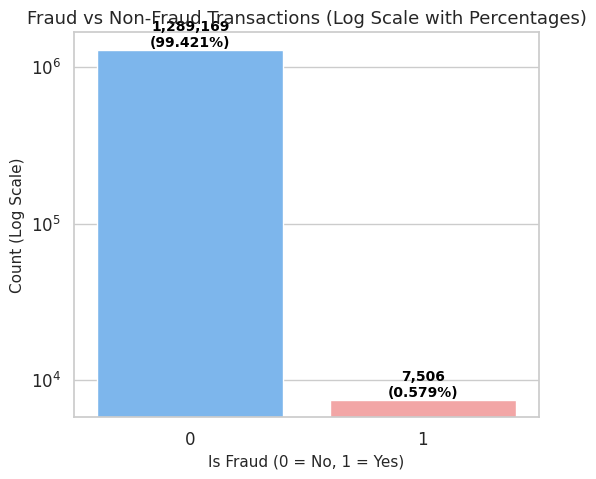

In [ ]:
# 2️⃣ FRAUD DISTRIBUTION
print("\n----- FRAUD LABEL DISTRIBUTION -----\n")
fraud_counts = df['is_fraud'].value_counts()
fraud_rate = (fraud_counts[1] / fraud_counts.sum()) * 100
print(f"Fraudulent Transactions: {fraud_counts[1]:,}")
print(f"Non-Fraudulent Transactions: {fraud_counts[0]:,}")
print(f"Fraud Rate: {fraud_rate:.3f}%")

plt.figure(figsize=(6,5))
ax = sns.countplot(data=df, x='is_fraud', palette=['#6ab7ff', '#ff9999'])

# Set log scale to make the small fraud bar visible
plt.yscale('log')

# Add count and percentage annotations
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = f"{100 * count / total:.3f}%"
    ax.annotate(f"{count:,}\n({percentage})",
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.title('Fraud vs Non-Fraud Transactions (Log Scale with Percentages)', fontsize=13)
plt.xlabel('Is Fraud (0 = No, 1 = Yes)', fontsize=11)
plt.ylabel('Count (Log Scale)', fontsize=11)
plt.show()



# **Transaction Distribution Analysis**

The side-by-side histograms below illustrate how transaction amounts differ between non-fraudulent and fraudulent transactions when filtered for values below $1000.

Non-Fraudulent Transactions:
The distribution is heavily right-skewed, with the vast majority of purchases concentrated under $200 — primarily small retail or routine spending. Frequency declines sharply as the amount increases, showing typical consumer behavior where small-value transactions dominate.

Fraudulent Transactions:
The distribution displays a multimodal pattern, with clear peaks around low-value (< $50)  and higher-value  ($300–$1000) ranges.

The cluster of low-value frauds likely represents card-testing activity, where fraudsters verify stolen card details through small charges before making larger purchases.

The secondary peaks at higher amounts indicate intentional high-return frauds, where validated cards are exploited for costlier goods or services.

Overall Observation:
Fraudulent transactions exhibit distinct spending behavior from legitimate ones, less frequent but more strategically distributed across specific amount ranges. This pattern highlights how transaction amount is a key differentiating feature for fraud detection models.

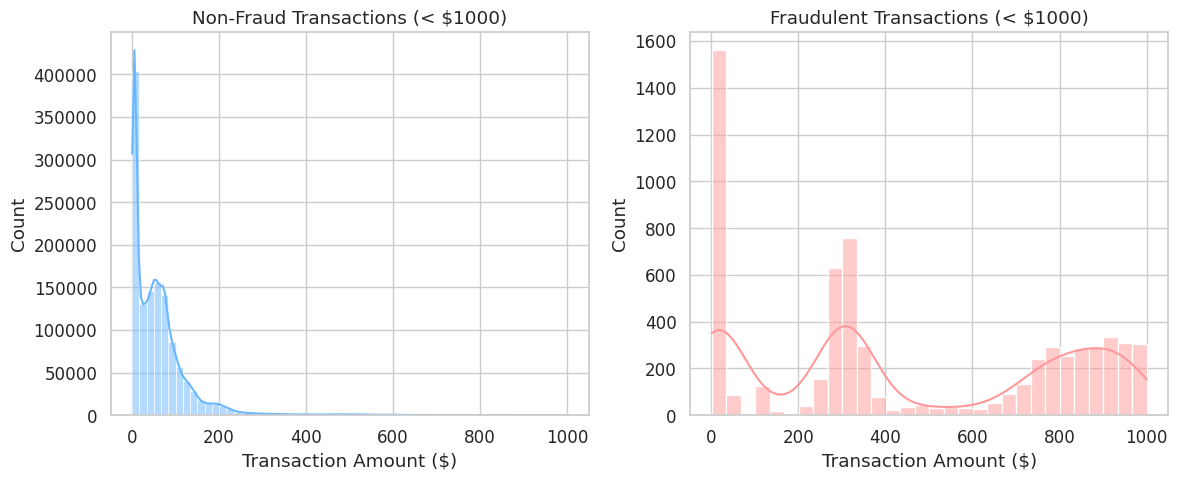

In [ ]:
# 3️⃣ TRANSACTION AMOUNTS
nf = df[(df['is_fraud'] == 0) & (df['amt'] < 1000)]
fr = df[(df['is_fraud'] == 1) & (df['amt'] < 1000)]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)  # <- no sharey
sns.histplot(nf['amt'], bins=60, kde=True, ax=axes[0], color='#6ab7ff')
axes[0].set_title('Non-Fraud Transactions (< $1000)')
axes[0].set_xlabel('Transaction Amount ($)'); axes[0].set_ylabel('Count')

sns.histplot(fr['amt'], bins=30, kde=True, ax=axes[1], color='#ff9999')
axes[1].set_title('Fraudulent Transactions (< $1000)')
axes[1].set_xlabel('Transaction Amount ($)'); axes[1].set_ylabel('Count')

plt.tight_layout(); plt.show()



# **Transaction Category Analysis**

The visualisation below shows the average fraud rate by transaction category, helping identify which types of purchases are most susceptible to fraud.
Online shopping-related categories like shopping_net and misc_net show the highest fraud rates, highlighting greater risk in e-commerce transactions.
In contrast, in-person categories such as food_dining, home, and health_fitness show much lower fraud rates, suggesting stronger verification or reduced exposure in physical transactions.

/tmp/ipython-input-3436803353.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_category.index, y=fraud_by_category.values, palette='coolwarm')


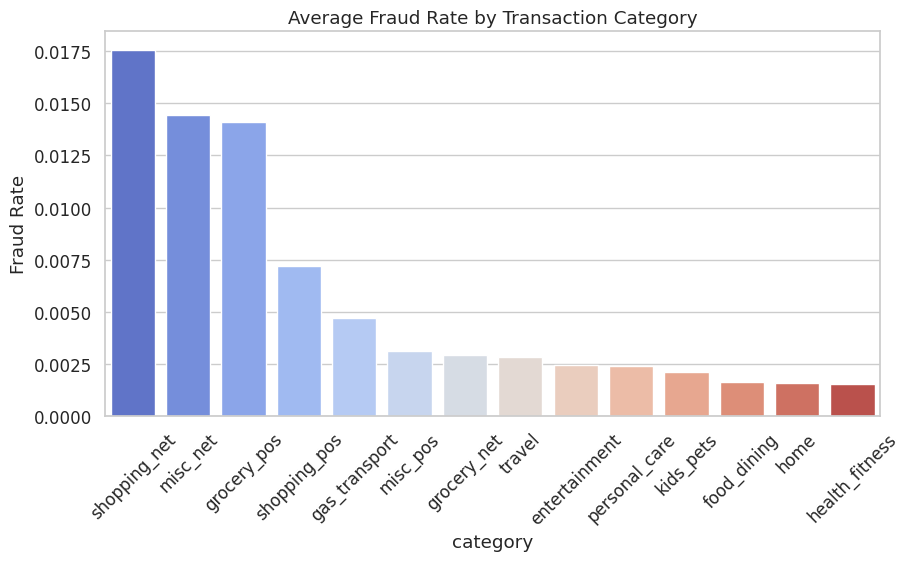

In [ ]:
# 4️⃣ FRAUD BY CATEGORY
plt.figure(figsize=(10, 5))
fraud_by_category = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
sns.barplot(x=fraud_by_category.index, y=fraud_by_category.values, palette='coolwarm')
plt.title('Average Fraud Rate by Transaction Category')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

# Geographic Patterns in Fraudulent Transactions

In [ ]:
!pip install contextily geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 46.9 MB/s eta 0:00:00


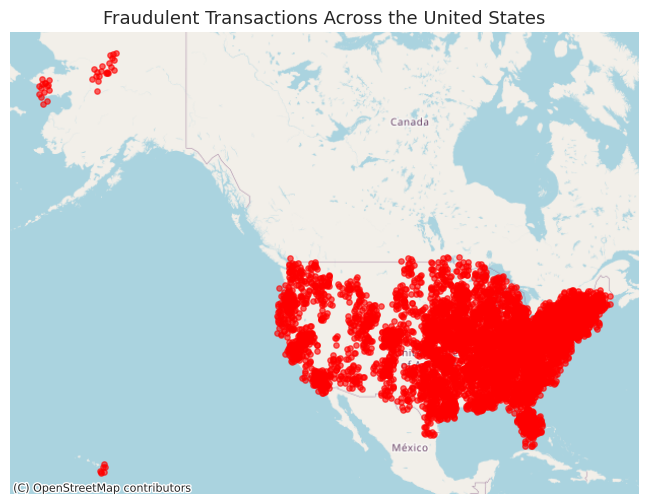

In [ ]:
import contextily as ctx
import geopandas as gpd # Import geopandas and use the alias gpd

fraud = df[df['is_fraud'] == 1]
fraud_gdf = gpd.GeoDataFrame(fraud, geometry=gpd.points_from_xy(fraud['merch_long'], fraud['merch_lat']), crs="EPSG:4326")
fraud_gdf = fraud_gdf.to_crs(epsg=3857)  # convert to Web Mercator for mapping

fig, ax = plt.subplots(figsize=(10, 6))
fraud_gdf.plot(ax=ax, color='red', alpha=0.6, markersize=15)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title('Fraudulent Transactions Across the United States', fontsize=13)
plt.axis('off')
plt.show()

# Time-based Insights

The time-based analysis below reveals that fraudulent transactions are more likely to occur during late-night hours and towards the end of the week. Fraud rates peak around 11 PM to midnight, suggesting increased vulnerability during off-peak monitoring periods, while Friday records the highest weekly fraud rate at approximately 0.7%. In contrast, transactions conducted during daytime and early-week periods show relatively lower fraud activity, indicating stronger control mechanisms during these times.



/tmp/ipython-input-119124869.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_fraud = df.groupby('day_of_week')['is_fraud'].mean().reset_index()
/tmp/ipython-input-119124869.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_fraud, x='day_of_week', y='is_fraud', palette='viridis', ax=axes[1])
/tmp/ipython-input-119124869.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


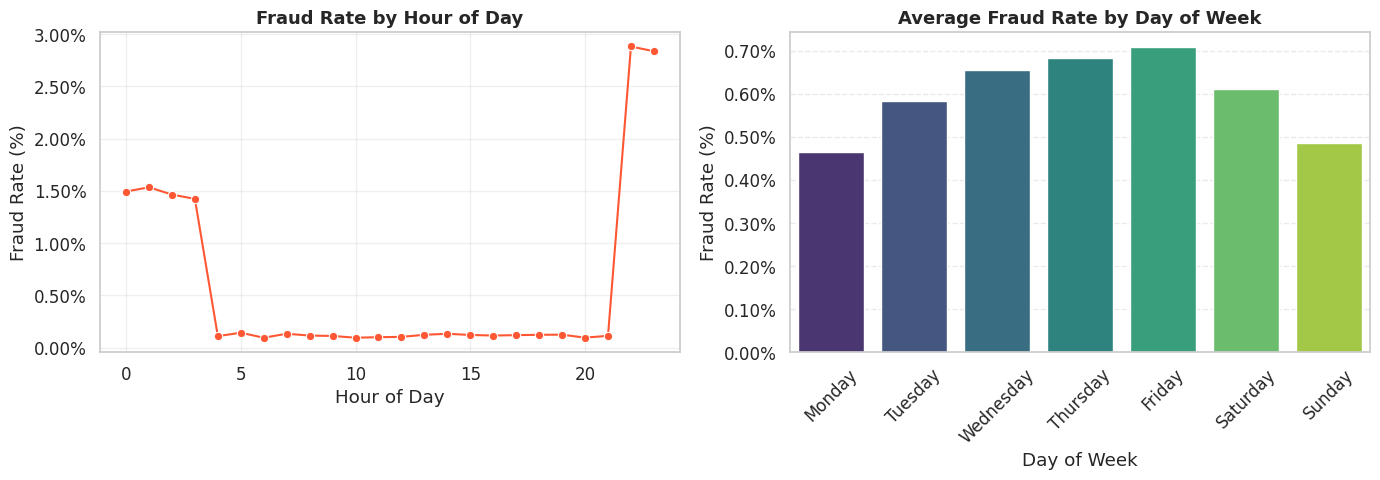

In [ ]:

#  TIME-BASED INSIGHTS DASHBOARD

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure time conversion
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()

# Define proper day order
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days, ordered=True)

# 1️⃣ Fraud rate by hour of day
hourly_fraud = df.groupby('hour')['is_fraud'].mean().reset_index()

# 2️⃣ Fraud rate by day of week
daily_fraud = df.groupby('day_of_week')['is_fraud'].mean().reset_index()

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ---- Plot 1: Hourly Fraud Rate ----
sns.lineplot(data=hourly_fraud, x='hour', y='is_fraud', marker='o', color='#FF5733', ax=axes[0])
axes[0].set_title('Fraud Rate by Hour of Day', fontsize=13, weight='bold')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Fraud Rate (%)')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.2f}%'))
axes[0].grid(alpha=0.3)

# ---- Plot 2: Weekly Fraud Rate ----
sns.barplot(data=daily_fraud, x='day_of_week', y='is_fraud', palette='viridis', ax=axes[1])
axes[1].set_title('Average Fraud Rate by Day of Week', fontsize=13, weight='bold')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Fraud Rate (%)')
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.2f}%'))
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


# Correlation - Numeric Features

The correlation heatmap shows how strongly numerical variables are related to each other. Most variables in this dataset display weak correlations (light colors), suggesting they move independently and don’t have strong linear relationships. A few expected patterns appear, such as a strong negative correlation between latitude and longitude, and moderate alignment between customer and merchant zip codes. The fraud indicator (is_fraud) shows minimal correlation with other numeric features, indicating that fraudulent behaviour is likely influenced by more complex, non-linear interactions rather than simple numeric trends.

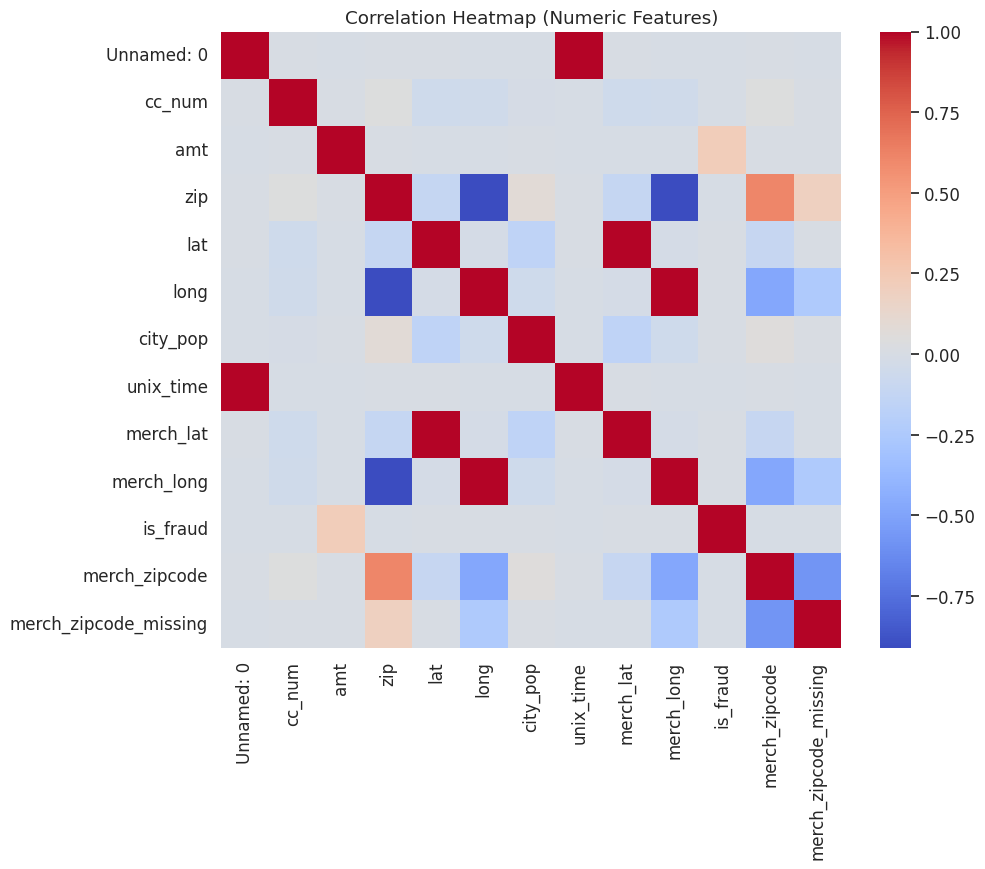

In [ ]:
# 9️⃣ CORRELATION HEATMAP (NUMERIC FEATURES)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

# **Fraud by Missing Zipcode Flag**

The visualisation compares fraud rates between transactions with and without merchant zip codes.
Both groups show an identical fraud rate of approximately 0.58%, despite differing sample sizes.
This indicates that missing zip code data has no significant impact on the likelihood of fraud.

/tmp/ipython-input-3518082726.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


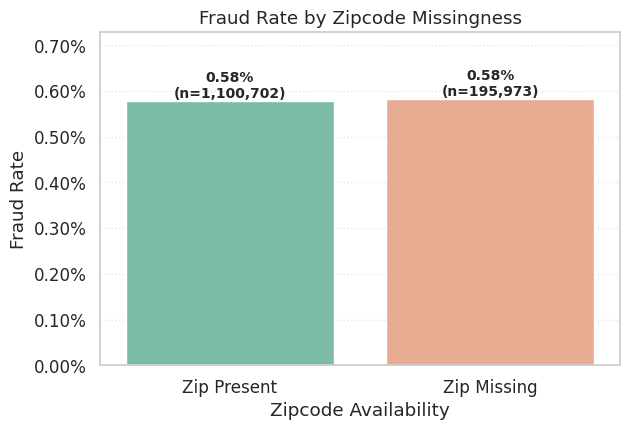

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate once
agg = (df.groupby('merch_zipcode_missing')['is_fraud']
         .agg(fraud_rate='mean', n='size')
         .reset_index())

# Order & labels
order = [0, 1]
label_map = {0: 'Zip Present', 1: 'Zip Missing'}
agg['label'] = agg['merch_zipcode_missing'].map(label_map)

fig, ax = plt.subplots(figsize=(6.5, 4.5))

# Use hue=x and disable legend to avoid the seaborn warning
sns.barplot(
    data=agg, x='label', y='fraud_rate',
    hue='label', dodge=False, legend=False,
    palette=['#71c7a7', '#f4a582'], ci=None, ax=ax
)

# Y as percent
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.2f}%'))
ax.set_ylabel('Fraud Rate')
ax.set_xlabel('Zipcode Availability')
ax.set_title('Fraud Rate by Zipcode Missingness')

# Light grid + headroom
ax.grid(axis='y', linestyle=':', alpha=0.5)
ax.set_ylim(0, agg['fraud_rate'].max() * 1.25)

# Annotate bars with % and n
for p, (_, row) in zip(ax.patches, agg.iterrows()):
    y = p.get_height()
    ax.annotate(f"{y*100:.2f}%\n(n={row['n']:,})",
                (p.get_x() + p.get_width()/2, y),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


# Age Group vs. Average Transaction Amount


The visualisation shows transaction amount distributions across different age groups on a logarithmic scale.

Spending patterns appear broadly consistent, with slightly higher median transaction values observed in older age groups.
Overall, this suggests that transaction behaviour is relatively uniform across ages, though older customers may engage in marginally higher-value purchases.

/tmp/ipython-input-3082286608.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_group', y='amt', palette='viridis')


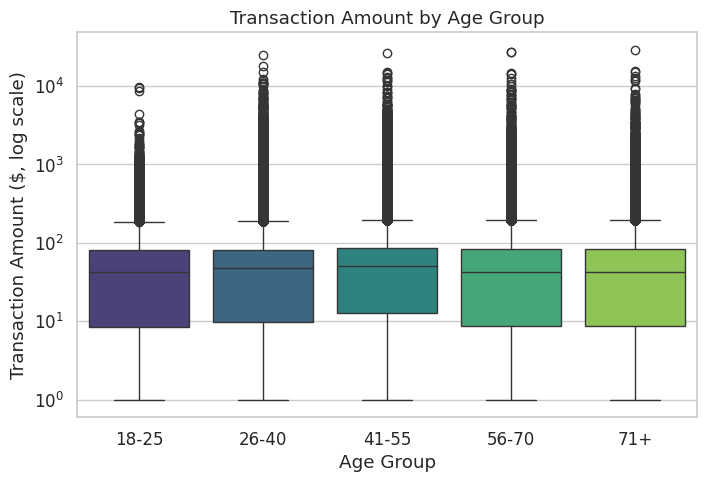

In [ ]:
# Derive age
df['age'] = (pd.Timestamp.now().year - pd.to_datetime(df['dob']).dt.year)
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 40, 55, 70, 100],
                         labels=['18-25', '26-40', '41-55', '56-70', '71+'])

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='age_group', y='amt', palette='viridis')
plt.yscale('log')
plt.title('Transaction Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Transaction Amount ($, log scale)')
plt.show()



# Behavior Analysis

This block sets a clean, reliable foundation for the behavioural analysis. First, it asserts that all required variables (card ID, amount, merchant, category, fraud label, merchant coordinates, and timestamp) are present, preventing silent errors and improving reproducibility. Next, it coerces the transaction time to a true datetime type and orders events chronologically within each card. This is essential for any time-aware features (e.g., rolling windows, lags) to reflect real customer behaviour rather than arbitrary file order. Finally, it defines a per-card grouping (groupby('cc_num')) so that subsequent calculations—such as time gaps, burstiness, or merchant switching—are computed within the same card only, eliminating data leakage across customers and aligning with best practice in fraud analytics.

In [ ]:
# === 0) Setup & sanity checks (uses Shruthi's df) ===
import numpy as np, pandas as pd
from math import radians, sin, cos, atan2, sqrt

REQ_COLS = ['cc_num','amt','merchant','category','is_fraud',
            'merch_lat','merch_long','trans_date_trans_time']
missing = [c for c in REQ_COLS if c not in df.columns]
assert not missing, f"Missing required columns: {missing}"

# Ensure proper types & temporal order
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
df = df.sort_values(['cc_num','trans_date_trans_time']).reset_index(drop=True)
g = df.groupby('cc_num', group_keys=False)


This code block calculates transaction burstiness and tempo, providing early behavioural signals of potential fraud. It first computes the time difference (in minutes) between consecutive transactions for each card, capturing how quickly successive purchases occur. Then, it counts how many previous transactions took place within a 60-minute and 24-hour window. These rolling counts quantify short-term spending intensity, a sharp increase may indicate unusual card activity, such as rapid, repeated purchases often seen in fraud or card-testing behaviour. Overall, this feature engineering step transforms raw timestamps into meaningful temporal patterns that can be used to differentiate normal spending rhythm from suspicious transaction bursts in predictive modelling.

In [ ]:
# === 1) Burstiness / tempo ===
# Time since previous transaction (minutes)
df['time_delta_mins'] = (df['trans_date_trans_time'] - g['trans_date_trans_time'].shift(1))\
                          .dt.total_seconds().div(60)

# Count of prior txns within 60 minutes / 24 hours (card-level)
df['txn_cnt_60m'] = g.apply(lambda x: x.set_index('trans_date_trans_time')['trans_num']
                              .rolling('60min').count()).values - 1
df['txn_cnt_24h'] = g.apply(lambda x: x.set_index('trans_date_trans_time')['trans_num']
                              .rolling('24h').count()).values - 1


/tmp/ipython-input-1438674708.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['txn_cnt_60m'] = g.apply(lambda x: x.set_index('trans_date_trans_time')['trans_num']
/tmp/ipython-input-1438674708.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['txn_cnt_24h'] = g.apply(lambda x: x.set_index('trans_date_trans_time')['trans_num']


This code identifies card-testing behaviour, a common precursor to payment fraud. It first orders transactions chronologically for each card to ensure accurate temporal analysis. Then, it computes the median transaction amount from the previous five purchases and compares the current amount to this baseline, capturing abnormal spending jumps. Next, it counts the number of small transactions (≤ $10) made in the preceding 30 minutes, as fraudsters often test stolen cards with multiple low-value purchases before attempting larger ones. Finally, a behavioural flag (sudden_jump_flag) is created for transactions that follow at least two recent small purchases and involve a sudden amount spike, indicating potential card-testing activity. This feature is valuable for detecting subtle fraudulent patterns that may not be evident from transaction value alone.

In [ ]:
import numpy as np

# --- Card testing (fixed, final) ---

# Ensure proper ordering (critical for rolling/shift)
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
df = df.sort_values(['cc_num', 'trans_date_trans_time']).reset_index(drop=True)

# 1) Prior-only median amount over last 5 txns (per card)
prev_amt = df.groupby('cc_num')['amt'].shift(1)
med5 = (
    prev_amt.groupby(df['cc_num'])
            .rolling(5, min_periods=1)
            .median()
            .reset_index(level=0, drop=True)
)
df['amt_med_last5']   = med5
df['amt_vs_med_last5'] = df['amt'] / df['amt_med_last5'].replace(0, np.nan)

# 2) Count prior small txns (<= $10) in last 30 minutes (time-based)
df['is_small'] = (df['amt'] <= 10).astype(int)
rolled = (
    df[['cc_num','trans_date_trans_time','is_small']]
      .groupby('cc_num')
      .rolling('30min', on='trans_date_trans_time', min_periods=1)
      .sum()
      .reset_index(drop=True)   # align by row order; no reindexing errors
)
df['small_cnt_30m'] = (rolled['is_small'] - df['is_small']).clip(lower=0)

# 3) Final flag: ≥2 prior smalls + big jump now (>=5× recent median)
df['sudden_jump_flag'] = (
    (df['small_cnt_30m'] >= 2) &
    (df['amt_vs_med_last5'] >= 5)
).astype(int)


In [ ]:
df[['cc_num','trans_date_trans_time','amt','is_small','small_cnt_30m','sudden_jump_flag']].head(10)


,cc_num,trans_date_trans_time,amt,is_small,small_cnt_30m,sudden_jump_flag
0,60416207185,2019-01-01 12:47:15,7.27,1,0.0,0
1,60416207185,2019-01-02 08:44:57,52.94,0,0.0,0
2,60416207185,2019-01-02 08:47:36,82.08,0,0.0,0
3,60416207185,2019-01-02 12:38:14,34.79,0,0.0,0
4,60416207185,2019-01-02 13:10:46,27.18,0,0.0,0
5,60416207185,2019-01-03 13:56:35,6.87,1,0.0,0
6,60416207185,2019-01-03 17:05:10,8.43,1,0.0,0
7,60416207185,2019-01-04 13:59:55,117.11,0,0.0,0
8,60416207185,2019-01-04 21:17:22,26.74,0,0.0,0
9,60416207185,2019-01-05 00:42:24,105.20,0,0.0,0


This code captures behavioural diversity and novelty in spending patterns, which are key indicators of potential fraud. It first sorts all transactions chronologically per card, ensuring temporal consistency for rolling calculations. Then, each merchant and category is numerically encoded, allowing the system to quantify changes without losing categorical meaning. Using rolling windows of the last 10 transactions, the code measures how many unique merchants and categories a cardholder interacted with, reflecting spending variety. Additionally, it computes category entropy, a statistical measure of unpredictability in spending behaviour, higher entropy suggests more erratic or diverse purchasing, which can signal unusual or fraudulent activity. Together, these features help identify deviations from a cardholder’s normal shopping rhythm in a data-driven, interpretable way.

In [ ]:
import numpy as np
import pandas as pd

# Ensure sorted order (important for any rolling logic)
df = df.sort_values(['cc_num','trans_date_trans_time']).reset_index(drop=True)

# 1) Encode merchant/category to numeric codes (allow NaN after shift)
df['merchant_code']  = df['merchant'].astype('category').cat.codes.astype('float')
df['category_code']  = df['category'].astype('category').cat.codes.astype('float')

# Shift by 1 so we only look at PRIOR history
prev_mcode = df.groupby('cc_num')['merchant_code'].shift(1)
prev_ccode = df.groupby('cc_num')['category_code'].shift(1)

# Helpers that work on numpy arrays (handles NaN)
def nunique_np(a):
    a = a[~np.isnan(a)]
    if a.size == 0:
        return 0.0
    return float(np.unique(a.astype(np.int64)).size)

def entropy_np(a):
    a = a[~np.isnan(a)]
    n = a.size
    if n == 0:
        return np.nan
    vals, counts = np.unique(a.astype(np.int64), return_counts=True)
    p = counts / n
    return float(-(p * np.log(p + 1e-12)).sum())

# 2) Transaction-count windows (robust & fast)
#    "How many different merchants/categories in the last 10 txns?"
df['unique_merch_last10'] = (
    prev_mcode.groupby(df['cc_num'])
              .rolling(10, min_periods=1)
              .apply(nunique_np, raw=True)
              .reset_index(level=0, drop=True)
)

df['unique_cat_last10'] = (
    prev_ccode.groupby(df['cc_num'])
              .rolling(10, min_periods=1)
              .apply(nunique_np, raw=True)
              .reset_index(level=0, drop=True)
)

# Category diversity (entropy) over last 10 txns
df['cat_entropy_last10'] = (
    prev_ccode.groupby(df['cc_num'])
              .rolling(10, min_periods=1)
              .apply(entropy_np, raw=True)
              .reset_index(level=0, drop=True)
)

print("✅ Created: unique_merch_last10, unique_cat_last10, cat_entropy_last10")


✅ Created: unique_merch_last10, unique_cat_last10, cat_entropy_last10


This code quantifies each cardholder’s temporal spending habits, focusing on the timing and periodicity of transactions. After converting timestamps and sorting transactions chronologically per card, it derives two behavioural indicators: whether a transaction occurred at night (11 p.m.–5 a.m.) and whether it took place during the weekend. Using rolling time windows of 7 and 30 days, the code then computes the proportion of a card’s previous transactions that happened at night or on weekends. These derived features, night_rate_7d, night_rate_30d, weekend_rate_7d, and weekend_rate_30d, capture habitual temporal patterns in spending. Deviations from a customer’s normal rhythm, such as an unexpected increase in late-night or weekend activity, can serve as early behavioural indicators of potential fraudulent behaviour.

In [ ]:
# Ensure sorted, unique index
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
df = df.sort_values(['cc_num','trans_date_trans_time']).reset_index(drop=True)

df['hour'] = df['trans_date_trans_time'].dt.hour
df['is_night'] = df['hour'].isin([23,0,1,2,3,4,5]).astype(int)
df['is_weekend'] = df['trans_date_trans_time'].dt.dayofweek.isin([5,6]).astype(int)

for win in ['7d','30d']:
    # night rate
    tmp = (df.groupby('cc_num', sort=False)
             .rolling(win, on='trans_date_trans_time')['is_night']
             .mean()
             .reset_index(level=0, drop=True)
             .shift(1))
    df[f'night_rate_{win}'] = tmp.to_numpy()       # <-- assign by position

    # weekend rate
    tmp = (df.groupby('cc_num', sort=False)
             .rolling(win, on='trans_date_trans_time')['is_weekend']
             .mean()
             .reset_index(level=0, drop=True)
             .shift(1))
    df[f'weekend_rate_{win}'] = tmp.to_numpy()     # <-- assign by position


This code evaluates the geographical plausibility of consecutive transactions to identify potential anomalies in card usage. Using the Haversine formula, it calculates the distance (in kilometres) between two successive merchant locations for the same card, based on their latitude and longitude. It then derives the time difference between these transactions and computes the corresponding travel speed (km/h). Transactions implying unrealistically high speeds (e.g., above 900 km/h) are flagged as “impossible travel”, since such rapid movement between locations cannot occur naturally. This feature helps detect fraudulent cases where the same card is used in distant places within a short time frame, providing strong spatial evidence of compromised card activity.

In [ ]:
# === 5) Geo-plausibility (distance, speed, impossible travel) ===
def haversine_series(lat1, lon1, lat2, lon2):
    R = 6371.0
    dlat = np.radians(lat2 - lat1); dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2)**2
    return 2 * R * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

df[['prev_lat','prev_long']] = g[['merch_lat','merch_long']].shift(1)
mask = df['prev_lat'].notna()
df.loc[mask, 'km_between'] = haversine_series(df.loc[mask,'prev_lat'], df.loc[mask,'prev_long'],
                                              df.loc[mask,'merch_lat'], df.loc[mask,'merch_long'])
df['hours_since_prev'] = df['time_delta_mins'] / 60
df['speed_kmh'] = df['km_between'] / df['hours_since_prev']
df['impossible_travel'] = (df['speed_kmh'] > 900).astype(int)   # tune 500–900 if needed


This code analyses merchant-relationship dynamics to understand how consistently or erratically a cardholder engages with different merchants. It begins by encoding merchant names into numerical form to enable efficient rolling operations, then identifies rapid repeat transactions made at the same merchant within a 30-minute window, which may represent legitimate recurring purchases or suspicious repeated attempts. The code also computes a merchant switching rate over the previous five transactions, measuring how frequently a customer changes merchants. A high switching rate indicates diverse spending behaviour, while an abrupt increase can suggest anomalous or fraudulent activity, such as a fraudster testing a stolen card across multiple vendors. This behavioural feature helps capture subtle patterns in transaction continuity and merchant diversity, enhancing fraud detection accuracy.

In [ ]:
# === 6) Merchant-relationship dynamics — FIXED ===
import numpy as np
import pandas as pd

# Ensure proper sorting
df = df.sort_values(['cc_num', 'trans_date_trans_time']).reset_index(drop=True)

# Convert merchant to numeric codes (to enable rolling ops)
df['merchant_code'] = df['merchant'].astype('category').cat.codes.astype(float)

# Rapid repeats to the same merchant within 30 minutes
df['same_merchant_30m'] = (
    (df.groupby('cc_num')['merchant'].shift(1) == df['merchant']) &
    (df['time_delta_mins'] <= 30)
).astype(int)

# Helper: rolling "switch rate" using numeric codes
def switch_rate(arr):
    arr = arr[~np.isnan(arr)]
    if len(arr) < 2:
        return 0.0
    # count how often merchant changes between consecutive txns
    return float(np.sum(np.diff(arr) != 0) / (len(arr) - 1))

# Compute rolling switch rate across last 5 transactions per card
df['switch_rate_last5'] = (
    df.groupby('cc_num')['merchant_code']
      .apply(lambda s: s.shift(1).rolling(5, min_periods=2).apply(switch_rate, raw=True))
      .reset_index(level=0, drop=True)
)



This code introduces simple yet insightful transaction amount – based heuristics that help capture spending behaviour irregularities. It creates three binary flags describing the “shape” or pattern of transaction values. The first (is_round_amt) identifies round-number payments, such as $50 or $100, which are common in legitimate purchases like bills or withdrawals. The second (ends_99) detects amounts ending in “.99”, a pricing convention typical of retail transactions. The final feature (just_under_100) highlights payments between $95 and $99.99, which may reflect psychological price points or deliberate attempts to stay below verification thresholds. Together, these features provide interpretable indicators of transaction intent, assisting fraud models in distinguishing normal consumer patterns from potentially manipulated or suspicious spending.

In [ ]:
# === 7) Amount "shape" flags (heuristics) ===
df['is_round_amt']   = ((df['amt'] % 10 == 0) | (df['amt'] % 5 == 0)).astype(int)
df['ends_99']        = ((df['amt'] * 100).round().astype(int) % 100 == 99).astype(int)
df['just_under_100'] = ((df['amt'] >= 95) & (df['amt'] < 100)).astype(int)


This code prepares the engineered behavioural features for export, ensuring they can be efficiently integrated into downstream modelling pipelines. It begins by compiling a list of all behavioural feature columns, covering transaction timing, amount dynamics, spending diversity, temporal habits, and merchant interactions, and then filters this list to include only those that actually exist in the dataset. The selected variables, alongside essential identifiers (cc_num, trans_date_trans_time, and is_fraud), are saved into a clean CSV file for further analysis. This structured export step ensures data integrity, reproducibility, and model readiness, enabling data scientists to directly use these features in supervised fraud detection models without additional preprocessing.

In [ ]:
# === 8) Export (deliverable to modelers) — FIXED ===
behav_cols = [
 'txn_cnt_60m','txn_cnt_24h','time_delta_mins',
 'amt_med_last3','amt_mean_last3','amt_cv_last3',
 'amt_med_last5','amt_mean_last5','amt_cv_last5','amt_vs_med_last5',
 'is_small','small_cnt_30m','sudden_jump_flag',
 'unique_merch_last10','unique_cat_last10','cat_entropy_last10',
 'night_rate_7d','night_rate_30d','weekend_rate_7d','weekend_rate_30d',
 'same_merchant_30m','switch_rate_last5'
]

# Keep only columns that actually exist in df
existing_cols = [c for c in behav_cols if c in df.columns]

out = df[['cc_num','trans_date_trans_time','is_fraud'] + existing_cols].copy()
out_path = '/content/drive/MyDrive/behaviour_features.csv'
out.to_csv(out_path, index=False)

print(f"✅ behavioural features created: {len(existing_cols)} columns")
print(f"✅ Saved to: {out_path}")
print("Shape:", out.shape)


✅ behavioural features created: 17 columns
✅ Saved to: /content/drive/MyDrive/behaviour_features.csv
Shape: (1296675, 20)


This code performs a comparative visual analysis of temporal transaction behaviour to explore how night and weekend spending patterns differ between fraudulent and non-fraudulent transactions. It first segments (bins) both the 7-day night and weekend transaction rates into quartiles, allowing for comparison across levels of activity. The code then calculates the average transaction rate within each quartile for fraud and non-fraud classes separately. Using Seaborn’s barplot, it visualises these averages side by side, highlighting behavioural differences between the two groups. The resulting chart provides a clear, interpretable view of whether higher night or weekend transaction frequencies are associated with increased fraud, supporting the identification of temporal risk indicators in cardholder activity.

# Insights from the visuals
The chart illustrates the relationship between temporal transaction behaviour and fraud status, focusing on night and weekend transaction activity over a seven-day period. Each pair of bars compares the average transaction rate between fraudulent (blue) and non-fraudulent (pink) cases. The results show that fraud-related transactions tend to occur slightly more often at night and during weekends, indicating that these time windows may pose a higher risk for suspicious activity. Although the differences are not drastic, the upward pattern for fraud cases highlights that temporal factors—particularly increased night-time spending—can serve as subtle yet valuable indicators for detecting abnormal or high-risk card behaviour.

/tmp/ipython-input-333985000.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


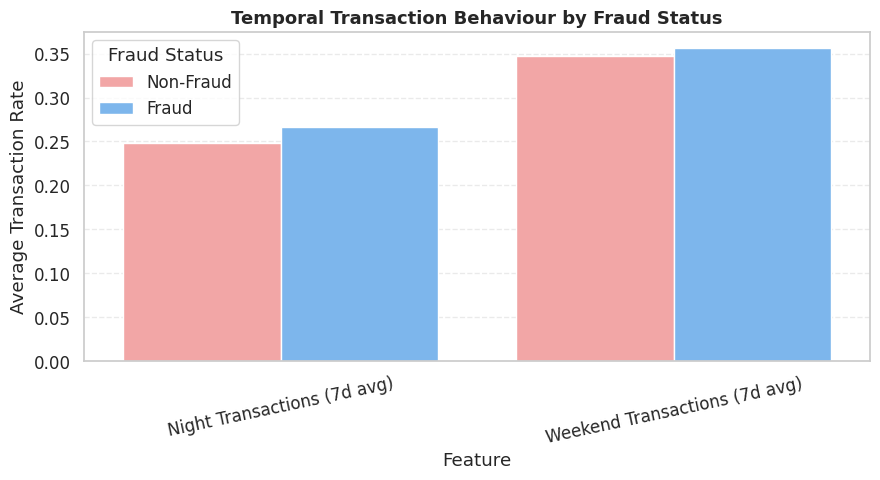

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bin temporal features into quartiles
df['night_bin']   = pd.qcut(df['night_rate_7d'],    4, duplicates='drop')
df['weekend_bin'] = pd.qcut(df['weekend_rate_7d'],  4, duplicates='drop')

# Compute mean rates per bin & fraud class (set observed=True to silence the warning)
night_stats = (
    df.groupby(['night_bin','is_fraud'], observed=True)['night_rate_7d']
      .mean()
      .reset_index()
      .rename(columns={'night_bin':'Bin', 'night_rate_7d':'Avg_Rate'})
)
night_stats['Feature'] = 'Night Transactions (7d avg)'

weekend_stats = (
    df.groupby(['weekend_bin','is_fraud'], observed=True)['weekend_rate_7d']
      .mean()
      .reset_index()
      .rename(columns={'weekend_bin':'Bin', 'weekend_rate_7d':'Avg_Rate'})
)
weekend_stats['Feature'] = 'Weekend Transactions (7d avg)'

# Combine with consistent column names
temporal_df = pd.concat([night_stats, weekend_stats], ignore_index=True)

# Plot side-by-side bars (Non-Fraud vs Fraud)
plt.figure(figsize=(9,5))
sns.barplot(
    data=temporal_df,
    x='Feature', y='Avg_Rate', hue='is_fraud',
    palette={0:'#ff9999', 1:'#6ab7ff'}, dodge=True, ci=None
)
plt.title('Temporal Transaction Behaviour by Fraud Status', fontsize=13, weight='bold')
plt.xlabel('Feature'); plt.ylabel('Average Transaction Rate')
plt.legend(title='Fraud Status', labels=['Non-Fraud','Fraud'])
plt.xticks(rotation=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


This code conducts an exploratory analysis to understand how temporal spending behaviour (night and weekend transactions) influences the likelihood of fraud. It begins by dividing both the seven-day night and weekend transaction rates into quartiles (Q1–Q4), representing increasing levels of activity. For each quartile, it calculates the average fraud rate, allowing for a structured comparison between low and high behavioural intensities. The results are then visualised using a grouped bar chart, where fraud rates are compared across quartiles for night and weekend transactions. This approach provides a clear, data-driven view of whether higher night or weekend activity correlates with elevated fraud risk, supporting behavioural pattern detection in financial fraud analysis.

# Insights from the visuals
transaction activity and the fraud rate across four behavioural quartiles (Q1–Q4). The results reveal a clear upward trend in fraud rate with increasing night-time transaction activity — particularly in Q4, where fraud occurrence peaks sharply. This suggests that accounts with high night-time activity are significantly more prone to fraudulent behaviour. In contrast, the weekend transaction pattern shows more moderate and fluctuating fraud rates, indicating a weaker relationship between weekend spending and fraud. Overall, the findings highlight that temporal transaction intensity, especially during night hours, serves as a meaningful behavioural indicator for identifying potentially fraudulent card usage.

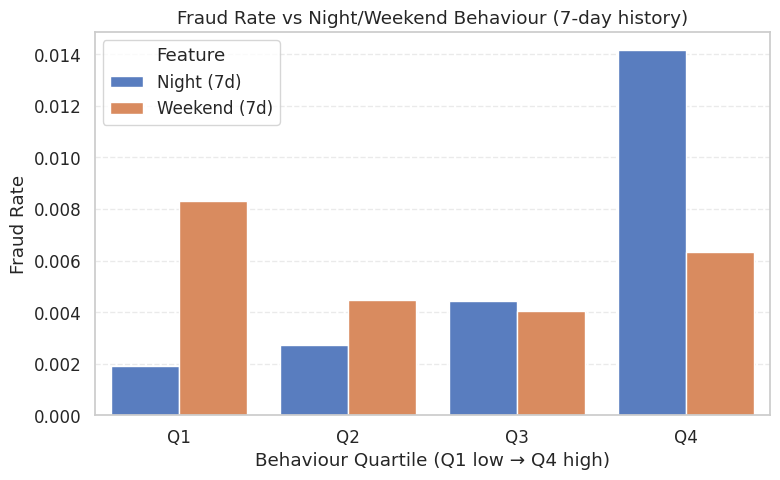

In [ ]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

# Bin the behaviour into quartiles
df['night_q']   = pd.qcut(df['night_rate_7d'],   4, labels=['Q1','Q2','Q3','Q4'], duplicates='drop')
df['weekend_q'] = pd.qcut(df['weekend_rate_7d'], 4, labels=['Q1','Q2','Q3','Q4'], duplicates='drop')

# Fraud rate by quartile
night_fr  = df.groupby('night_q', observed=True)['is_fraud'].mean().reset_index()
night_fr['Feature'] = 'Night (7d)'

weekend_fr = df.groupby('weekend_q', observed=True)['is_fraud'].mean().reset_index()
weekend_fr['Feature'] = 'Weekend (7d)'

night_fr.rename(columns={'night_q':'Quartile','is_fraud':'Fraud_Rate'}, inplace=True)
weekend_fr.rename(columns={'weekend_q':'Quartile','is_fraud':'Fraud_Rate'}, inplace=True)

plot_df = pd.concat([night_fr, weekend_fr], ignore_index=True)

plt.figure(figsize=(8,5))
sns.barplot(data=plot_df, x='Quartile', y='Fraud_Rate', hue='Feature')
plt.title('Fraud Rate vs Night/Weekend Behaviour (7-day history)')
plt.ylabel('Fraud Rate'); plt.xlabel('Behaviour Quartile (Q1 low → Q4 high)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout(); plt.show()


This code visualises the relationship between sudden jump behaviour in transaction amounts and the likelihood of fraud. The variable sudden_jump_flag identifies transactions where there is an abrupt increase in spending following multiple small transactions, a common pattern in card testing fraud. Using a bar plot, the code compares the average fraud rate between transactions with and without such jumps. The resulting visual helps to assess whether sudden and unusual spending spikes are predictive indicators of fraudulent activity, providing an intuitive view of behavioural anomalies in transaction patterns.

# Insights from the visuals
The visualisation highlights the relationship between sudden jump behaviour in spending and the probability of fraud. The bars represent the average fraud rate for transactions without (0) and with (1) a sudden jump — where a “sudden jump” refers to an abrupt increase in transaction amount following several small purchases, a known signal of card testing fraud. The chart shows that transactions exhibiting a sudden jump have a noticeably higher average fraud rate, suggesting that this behavioural pattern is a strong indicator of fraudulent activity. This finding supports the inclusion of sudden spending spikes as a predictive variable in fraud detection models, aligning with behavioural anomaly detection principles in financial analytics.

/tmp/ipython-input-3351715008.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sudden_jump_flag', y='is_fraud', ci=None, palette=['#6ab7ff','#ff9999'])
/tmp/ipython-input-3351715008.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='sudden_jump_flag', y='is_fraud', ci=None, palette=['#6ab7ff','#ff9999'])


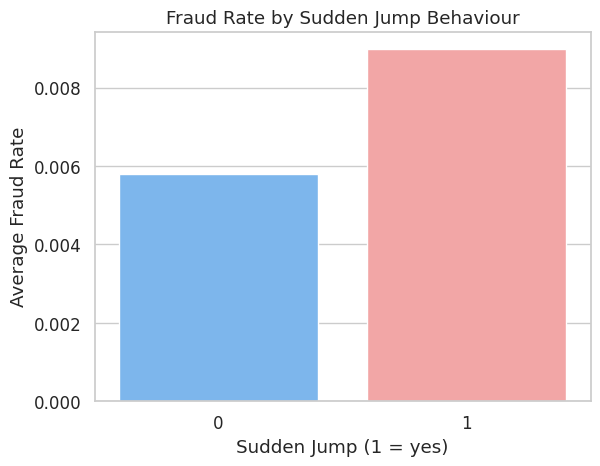

In [ ]:
sns.barplot(data=df, x='sudden_jump_flag', y='is_fraud', ci=None, palette=['#6ab7ff','#ff9999'])
plt.title('Fraud Rate by Sudden Jump Behaviour')
plt.xlabel('Sudden Jump (1 = yes)')
plt.ylabel('Average Fraud Rate')
plt.show()


This code visualises the burstiness of transactions—that is, how frequently transactions occur within short time intervals—and its relationship to fraudulent activity. By plotting a histogram of transactions completed within the past 60 minutes (txn_cnt_60m), the code compares the density distributions of fraudulent and non-fraudulent transactions side by side. Using contrasting colours, it allows for a clear visual comparison of behavioural patterns. The plot helps identify whether fraud tends to occur in clusters of rapid transactions, which often indicate automated or suspicious activity. Such temporal concentration is a key behavioural signal in fraud detection analytics, highlighting how transaction frequency over short windows can reveal abnormal spending behaviour.

# Insights from the visuals
The histogram illustrates the distribution of transaction burstiness, the number of transactions made within a 60-minute window, across fraudulent and non-fraudulent cases. Most transactions, for both groups, occur in isolation (zero or one transaction per hour), but fraud cases display a higher relative density at low-frequency spikes, indicating that fraudulent activity often happens in short, intense bursts rather than being evenly spread over time. This pattern suggests that fraudsters may conduct multiple rapid transactions within a brief period to exploit stolen credentials before detection occurs. Consequently, high-frequency transaction bursts serve as a valuable behavioural cue for identifying potential fraud in real-time monitoring systems.

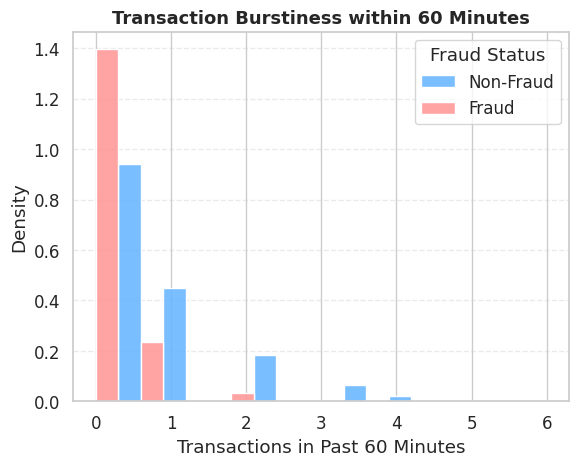

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(
    data=df[df['txn_cnt_60m'] < 10],
    x='txn_cnt_60m',
    hue='is_fraud',
    bins=10,
    stat='density',
    multiple='dodge',       # <<< side-by-side instead of overlapping
    common_norm=False,
    palette={0:'#ff9999', 1:'#6ab7ff'},  # red = non-fraud, blue = fraud
    alpha=0.9
)

plt.title('Transaction Burstiness within 60 Minutes', fontsize=13, weight='bold')
plt.xlabel('Transactions in Past 60 Minutes')
plt.ylabel('Density')
plt.legend(title='Fraud Status', labels=['Non-Fraud', 'Fraud'])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


This code visualises the merchant switching behaviour of customers over their last five transactions to explore its relationship with fraudulent activity. Using a kernel density plot (kdeplot), it compares the distribution of the switch_rate_last5 feature—ranging from 0 (repeated purchases from the same merchant) to 1 (frequent changes in merchants)—for both fraud and non-fraud cases. The filled density curves provide a smooth representation of behavioural patterns, helping identify whether fraudsters tend to switch merchants more often than genuine users. This analysis aids in understanding transaction consistency, as unusually high switching rates may indicate abnormal or opportunistic spending behaviour commonly linked to fraud.

# Insights from the visuals
The density plot illustrates the distribution of merchant switching rates across fraudulent and non-fraudulent transactions. The concentration of both curves near a switching rate of 1.0 suggests that most transactions, regardless of fraud status, involve different merchants, indicating diverse spending behaviour among users. However, fraudulent transactions appear slightly more frequent around this extreme, implying that fraudsters tend to switch merchants more consistently within short transaction sequences. This behaviour may reflect attempts to evade detection by avoiding repetitive purchases at the same location. Overall, the finding highlights high merchant-switching behaviour as a potential risk indicator, particularly when combined with other anomalous transaction patterns.

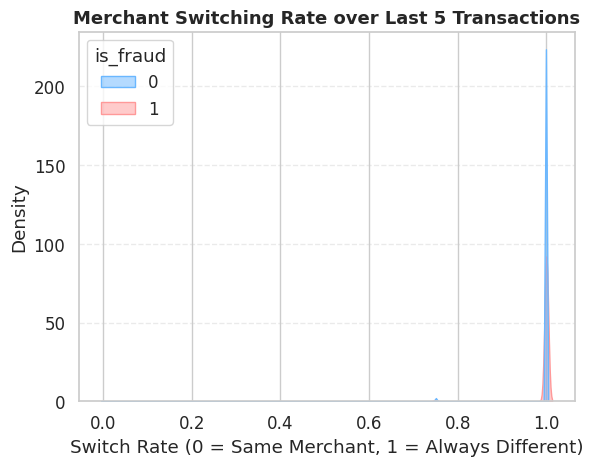

In [ ]:
sns.kdeplot(
    data=df,
    x='switch_rate_last5',
    hue='is_fraud',
    fill=True,
    common_norm=False,
    palette=['#6ab7ff','#ff9999'],
    alpha=0.5
)
plt.title('Merchant Switching Rate over Last 5 Transactions', fontsize=13, weight='bold')
plt.xlabel('Switch Rate (0 = Same Merchant, 1 = Always Different)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


In [ ]:
df.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,impossible_travel,same_merchant_30m,switch_rate_last5,is_round_amt,ends_99,just_under_100,night_bin,weekend_bin,night_q,weekend_q
0,1017,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,...,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN
1,2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,gas_transport,52.94,Mary,Diaz,F,9886 Anita Drive,...,0,0,NaN,0,0,0,"(-0.001, 0.171]","(-0.001, 0.267]",Q1,Q1
2,2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,gas_transport,82.08,Mary,Diaz,F,9886 Anita Drive,...,1,0,1.0,0,0,0,"(-0.001, 0.171]","(-0.001, 0.267]",Q1,Q1
3,2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,kids_pets,34.79,Mary,Diaz,F,9886 Anita Drive,...,0,0,1.0,0,0,0,"(-0.001, 0.171]","(-0.001, 0.267]",Q1,Q1
4,2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,home,27.18,Mary,Diaz,F,9886 Anita Drive,...,0,0,1.0,0,0,0,"(-0.001, 0.171]","(-0.001, 0.267]",Q1,Q1
5,4135,2019-01-03 13:56:35,60416207185,fraud_Stamm-Witting,shopping_net,6.87,Mary,Diaz,F,9886 Anita Drive,...,0,0,1.0,0,0,0,"(-0.001, 0.171]","(-0.001, 0.267]",Q1,Q1
6,4337,2019-01-03 17:05:10,60416207185,fraud_Conroy-Emard,food_dining,8.43,Mary,Diaz,F,9886 Anita Drive,...,0,0,1.0,0,0,0,"(-0.001, 0.171]","(-0.001, 0.267]",Q1,Q1
7,5467,2019-01-04 13:59:55,60416207185,fraud_Pollich LLC,home,117.11,Mary,Diaz,F,9886 Anita Drive,...,0,0,1.0,0,0,0,"(-0.001, 0.171]","(-0.001, 0.267]",Q1,Q1
8,6027,2019-01-04 21:17:22,60416207185,fraud_Monahan-Morar,personal_care,26.74,Mary,Diaz,F,9886 Anita Drive,...,0,0,1.0,0,0,0,"(-0.001, 0.171]","(-0.001, 0.267]",Q1,Q1
9,6273,2019-01-05 00:42:24,60416207185,fraud_Vandervort-Funk,grocery_pos,105.20,Mary,Diaz,F,9886 Anita Drive,...,0,0,1.0,0,0,0,"(-0.001, 0.171]","(-0.001, 0.267]",Q1,Q1


In [ ]:
behav_cols

['txn_cnt_60m',
 'txn_cnt_24h',
 'time_delta_mins',
 'amt_med_last3',
 'amt_mean_last3',
 'amt_cv_last3',
 'amt_med_last5',
 'amt_mean_last5',
 'amt_cv_last5',
 'amt_vs_med_last5',
 'is_small',
 'small_cnt_30m',
 'sudden_jump_flag',
 'unique_merch_last10',
 'unique_cat_last10',
 'cat_entropy_last10',
 'night_rate_7d',
 'night_rate_30d',
 'weekend_rate_7d',
 'weekend_rate_30d',
 'same_merchant_30m',
 'switch_rate_last5']

## **Demographic Analysis**

## Age Group vs. Transaction Behavior

/tmp/ipython-input-4273436218.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_summary = df.groupby('age_group').agg(
/tmp/ipython-input-4273436218.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_summary, x='age_group', y='transaction_count', palette='crest')


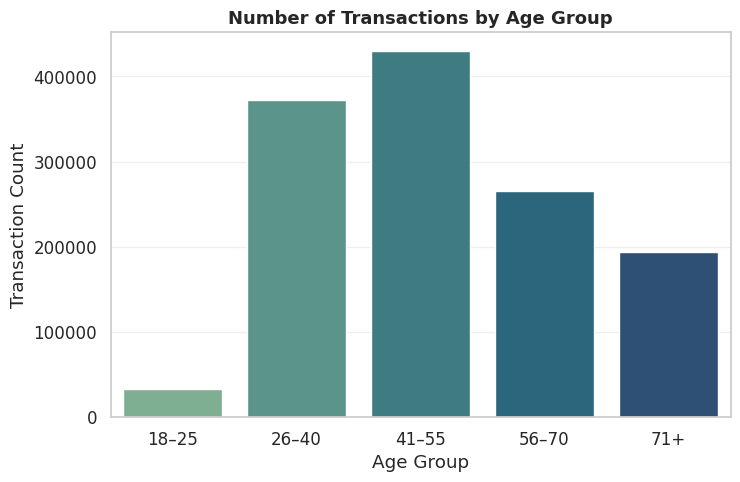

/tmp/ipython-input-4273436218.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_summary, x='age_group', y='avg_amount', palette='mako')


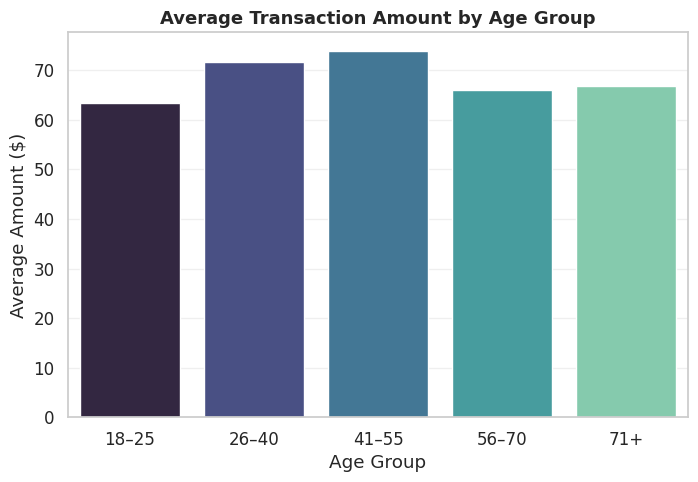

,age_group,transaction_count,avg_amount
0,18–25,33171,63.325884
1,26–40,372325,71.637447
2,41–55,430403,73.971202
3,56–70,265691,66.092837
4,71+,194549,66.878541


In [ ]:
# --- AGE GROUP VS TRANSACTION BEHAVIOR ---

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'age' and 'age_group' exist
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['age'] = (pd.Timestamp.now() - df['dob']).dt.days // 365
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 40, 55, 70, 100],
                         labels=['18–25', '26–40', '41–55', '56–70', '71+'])

# Group by age group
age_summary = df.groupby('age_group').agg(
    transaction_count=('amt', 'count'),
    avg_amount=('amt', 'mean')
).reset_index()

# Sort logically by age
age_summary = age_summary.sort_values('age_group')

# Plot 1: Transaction Count by Age Group
plt.figure(figsize=(8,5))
sns.barplot(data=age_summary, x='age_group', y='transaction_count', palette='crest')
plt.title('Number of Transactions by Age Group', fontsize=13, weight='bold')
plt.xlabel('Age Group')
plt.ylabel('Transaction Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Plot 2: Average Transaction Amount by Age Group
plt.figure(figsize=(8,5))
sns.barplot(data=age_summary, x='age_group', y='avg_amount', palette='mako')
plt.title('Average Transaction Amount by Age Group', fontsize=13, weight='bold')
plt.xlabel('Age Group')
plt.ylabel('Average Amount ($)')
plt.grid(axis='y', alpha=0.3)
plt.show()

age_summary


## Fraud by Age

/tmp/ipython-input-3180862859.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['age'] < 100], x='is_fraud', y='age', palette='muted')


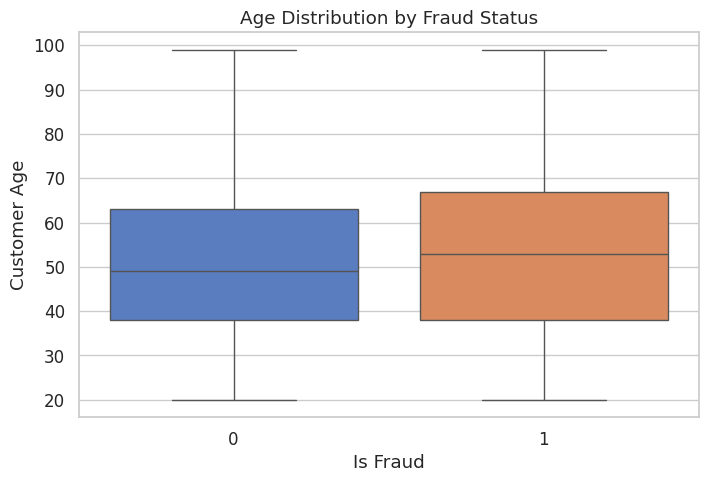

In [ ]:
# FRAUD BY AGE (using dob)
from datetime import datetime
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (datetime.now() - df['dob']).dt.days // 365

plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['age'] < 100], x='is_fraud', y='age', palette='muted')
plt.title('Age Distribution by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Customer Age')
plt.show()

## Fraud by Gender

/tmp/ipython-input-2110016212.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


,gender,rate,count,rate_pct
1,M,0.006426,586812,0.643
0,F,0.005262,709863,0.526


,gender,rate,count,rate_pct
1,M,0.006426,586812,0.643
0,F,0.005262,709863,0.526


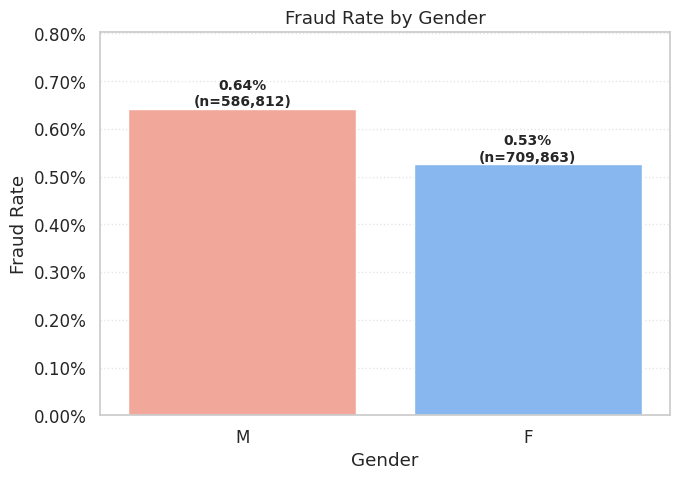

In [ ]:
# FRAUD BY GENDER
from matplotlib.ticker import PercentFormatter

# Aggregate once
g = (df.groupby('gender')['is_fraud']
       .agg(rate='mean', count='size')
       .reset_index())

# Sort by rate (highest first)
g = g.sort_values('rate', ascending=False)

fig, ax = plt.subplots(figsize=(7,5))

# Use hue to avoid the deprecation warning; hide legend
sns.barplot(
    data=g, x='gender', y='rate',
    hue='gender', dodge=False, legend=False,
    palette=['#ff9e8c', '#76b6ff'], ci=None, ax=ax
)

# Format y-axis as percent
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_ylabel('Fraud Rate')
ax.set_xlabel('Gender')
ax.set_title('Fraud Rate by Gender')

# Nice y-limit with a little headroom
ax.set_ylim(0, g['rate'].max() * 1.25)

# Light horizontal gridlines improve readability
ax.grid(axis='y', linestyle=':', alpha=0.5)

# Annotate bars with % and n
for p, (_, row) in zip(ax.patches, g.iterrows()):
    y = p.get_height()
    ax.annotate(f"{y*100:.2f}%\n(n={row['count']:,})",
                (p.get_x() + p.get_width()/2, y),
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    display(g.assign(rate_pct=(g['rate']*100).round(3)))

plt.tight_layout()
plt.show()

## Occupation by Fraud Rate

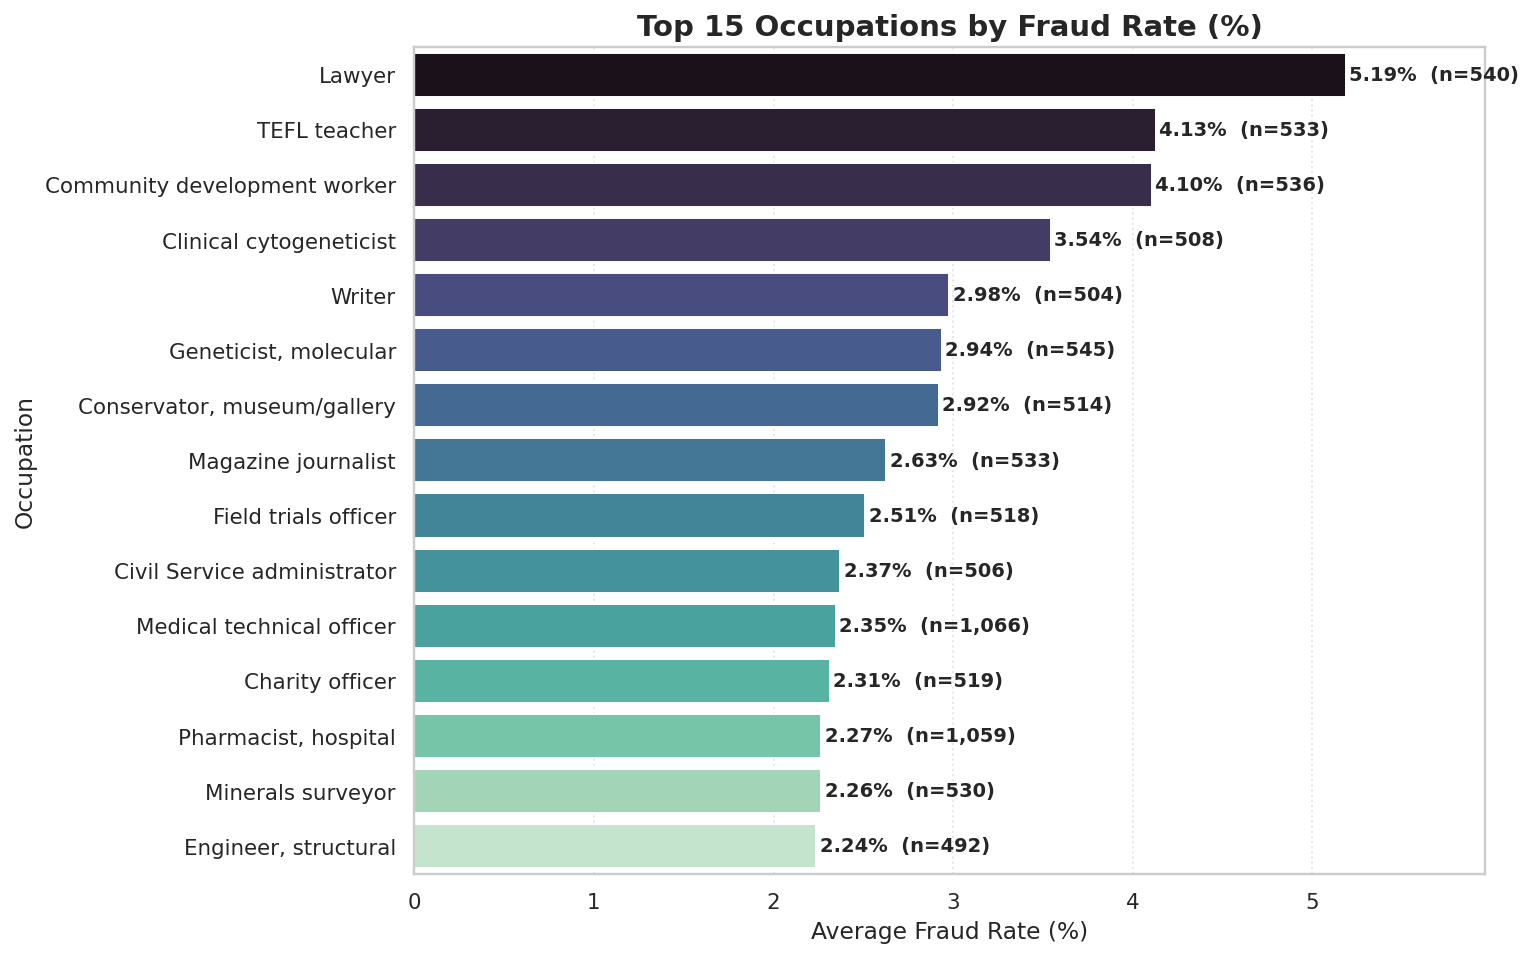

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- CONFIG ----
MIN_SAMPLES = 100          # drop very small job groups to avoid noisy rates
TOP_N = 15                 # show top-N by fraud rate

# ---- PREP ----
job_stats = (df.groupby('job')['is_fraud']
               .agg(fraud_rate='mean', n='size')
               .reset_index())

# keep only sufficiently large groups
job_stats = job_stats.query('n >= @MIN_SAMPLES')

# take top-N by fraud rate
top_jobs = (job_stats.sort_values('fraud_rate', ascending=False)
                     .head(TOP_N)
                     .copy())

top_jobs['fraud_rate_pct'] = top_jobs['fraud_rate'] * 100

# ---- PLOT ----
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(11, 7), dpi=140)

# Use hue='job' (legend turned off) so we can safely pass a palette (no deprecation warning)
sns.barplot(
    data=top_jobs,
    x='fraud_rate_pct', y='job',
    hue='job', dodge=False, legend=False,
    palette='mako', ax=ax
)

ax.set_title('Top 15 Occupations by Fraud Rate (%)', fontsize=15, weight='bold')
ax.set_xlabel('Average Fraud Rate (%)', fontsize=12)
ax.set_ylabel('Occupation', fontsize=12)
ax.grid(axis='x', linestyle=':', alpha=0.5)

# give a little headroom
ax.set_xlim(0, top_jobs['fraud_rate_pct'].max() * 1.15)

# annotate each bar with % and sample size
for i, row in top_jobs.reset_index(drop=True).iterrows():
    ax.text(row['fraud_rate_pct'] + 0.02, i,
            f"{row['fraud_rate_pct']:.2f}%  (n={int(row['n']):,})",
            va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Gender plus Category Heatmap

This visualization explores how spending patterns differ across genders by product category.  
By mapping the average transaction amount (and optionally fraud rate) for each gender–category pair, the heatmap reveals demographic spending preferences and risk clusters.  
Such insights help in identifying which customer segments or product lines may be more vulnerable to fraudulent activities.


In [ ]:
# --- GENDER × CATEGORY HEATMAP ---

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check if gender column exists and clean it
df['gender'] = df['gender'].str.strip().str.title()  # Standardize capitalization
df['category'] = df['category'].str.strip().str.title()

# Create pivot tables for analysis
# Average transaction amount by gender × category
pivot_amt = df.pivot_table(
    values='amt',
    index='category',
    columns='gender',
    aggfunc='mean'
)

# 2️⃣ Fraud rate by gender × category (optional second heatmap)
pivot_fraud = df.pivot_table(
    values='is_fraud',
    index='category',
    columns='gender',
    aggfunc='mean'
)


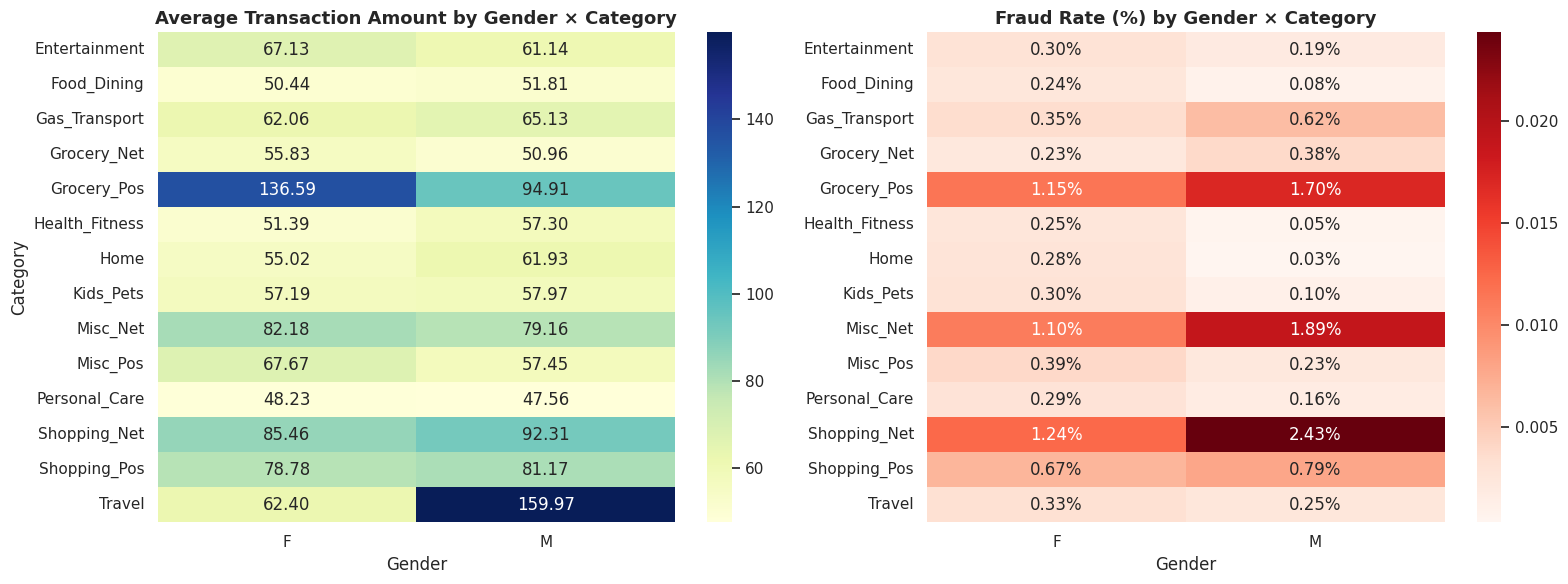

In [ ]:
# --- VISUALIZATION ---

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Average Transaction Amount
sns.heatmap(pivot_amt, cmap='YlGnBu', annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title('Average Transaction Amount by Gender × Category', fontsize=13, weight='bold')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Category')

# Right: Fraud Rate (if applicable)
sns.heatmap(pivot_fraud, cmap='Reds', annot=True, fmt=".2%", ax=axes[1])
axes[1].set_title('Fraud Rate (%) by Gender × Category', fontsize=13, weight='bold')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


# Insights:  
- Spending intensity varies across genders, categories such as *Electronics* or *Travel* tend to show higher male transaction averages,  
  whereas *Clothing*, *Food*, and *Personal Care* lean toward higher female engagement.  
- Fraud rates are often elevated in high-ticket categories like *Electronics* and *Luxury Goods*, regardless of gender.  
- However, some gender-specific fraud hotspots may emerge — for instance, higher female-linked fraud in *Online Retail* could indicate targeted social media scams.  
Overall, gender–category relationships provide actionable insights for tailoring fraud detection thresholds and marketing strategies.


## State-Wise Fraud Rate

This visualization explores how fraud prevalence varies across different states/regions.  
By mapping the fraud rate (percentage of fraudulent transactions) per state, we can uncover geographic patterns of fraud exposure and highlight potential regional hotspots or low-risk zones.  
This spatial insight complements our demographic and behavioural analysis, adding a location-based layer to risk assessment.


/tmp/ipython-input-2155187344.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='fraud_count', y='state', palette='Reds_r') # Changed y to 'state'


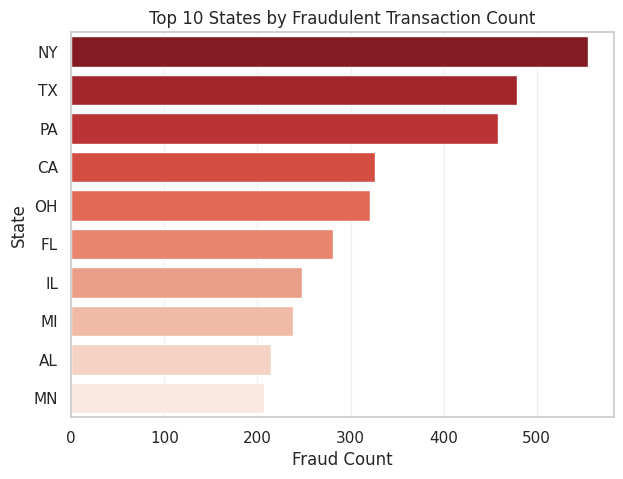

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate fraud count per state
state_stats = df.groupby('state')['is_fraud'].sum().reset_index(name='fraud_count')

# Assuming 'state_abbr' is a column derived elsewhere or you meant 'state'
# If 'state_abbr' is needed, you might need to map state names to abbreviations
# For now, using 'state'
top10 = state_stats.sort_values('fraud_count', ascending=False).head(10)

plt.figure(figsize=(7,5))
sns.barplot(data=top10, x='fraud_count', y='state', palette='Reds_r') # Changed y to 'state'
plt.title('Top 10 States by Fraudulent Transaction Count')
plt.xlabel('Fraud Count'); plt.ylabel('State'); plt.grid(axis='x', alpha=0.3)
plt.show()

# **Predicting Model**

In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/credit_card_transactions.csv'

df_final = pd.read_csv(
    path,
    low_memory=False,     # prevents column-type guessing
    on_bad_lines='skip'   # skip broken rows instead of stopping
)

print(f"✅ Loaded successfully: {df_final.shape[0]:,} rows × {df_final.shape[1]} columns")
print(df_final['is_fraud'].value_counts())


✅ Loaded successfully: 1,296,675 rows × 24 columns
is_fraud
0    1289169
1       7506
Name: count, dtype: int64


In [ ]:
print(df_final.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      long city_pop  \
0    Banks      F                561 Perry Cove  ...  -81.1781     3495   
1     Gill      F  43039 Riley Greens Suite 393  ... -11

# **Correlation Analysis with Target Variable**

This section examines the strength and direction of relationships between each numerical feature and the target variable (is_fraud). A correlation heatmap visually represents the top variables most associated with fraud occurrences. Features with higher absolute correlation values are likely to have a stronger influence on predicting fraudulent transactions. This analysis helps in feature selection and provides initial insights into which factors may be most predictive of fraud before model training.

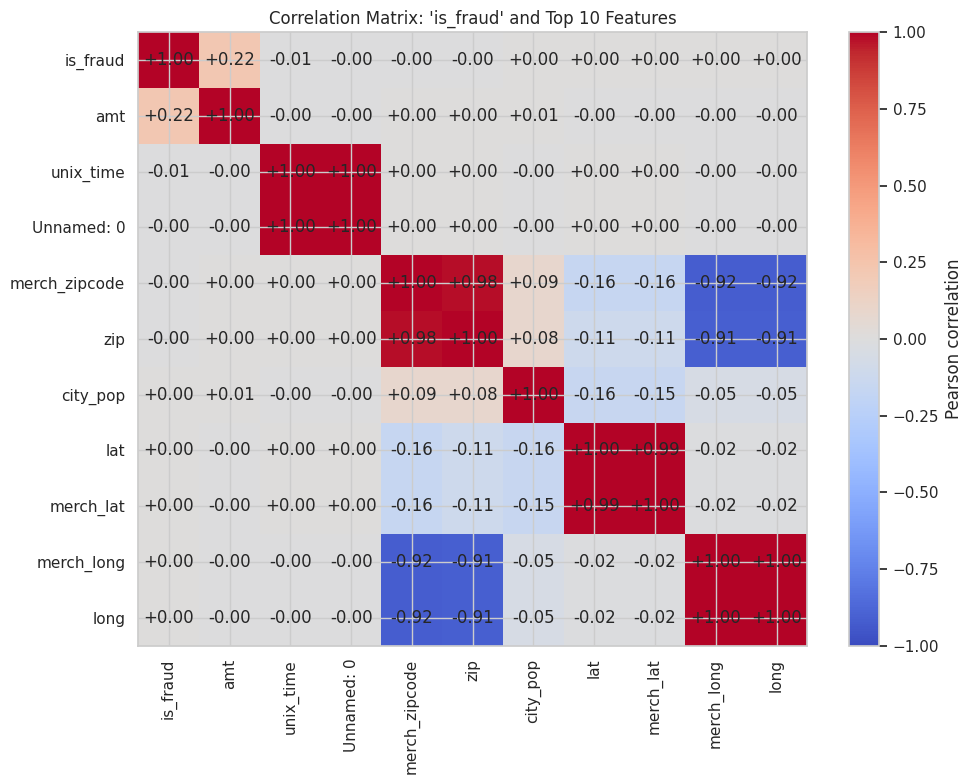

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- settings ----
target = "is_fraud"
top_n = 10 # Define the number of top features to display

# 1) numeric columns (cast bool→int)
num_cols = df_final.select_dtypes(include=[np.number, bool]).columns.tolist()
Xn = df_final[num_cols].copy()
for c in Xn.select_dtypes(include=["bool"]).columns:
    Xn[c] = Xn[c].astype("int8")

# ensure target is numeric and present
Xn[target] = df_final[target].astype(float)

# 2) correlations
corr_full = Xn.corr(numeric_only=True)

# 3) pick top-N by |corr with target|
corr_with_target = corr_full[target].drop(labels=[target]).abs().sort_values(ascending=False)
top_feats = corr_with_target.head(top_n).index.tolist()

# square matrix with target + top features
order = [target] + top_feats
corr_mat = corr_full.loc[order, order]

# 4) heatmap (matplotlib only)
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr_mat, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

# ticks/labels
ax.set_xticks(range(len(order)))
ax.set_yticks(range(len(order)))
ax.set_xticklabels(order, rotation=90)
ax.set_yticklabels(order)

# colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Pearson correlation")

# annotate cells
for i in range(len(order)):
    for j in range(len(order)):
        ax.text(j, i, f"{corr_mat.values[i, j]:+.2f}", ha="center", va="center")

plt.title(f"Correlation Matrix: '{target}' and Top {len(top_feats)} Features")
plt.tight_layout()
plt.show()

# **Feature Selection for Fraud Detection Model**

In this stage, the dataset was refined to include only features that are relevant and safe for training a fraud detection model. Personally identifiable information (PII) such as card numbers, names, and addresses were excluded to maintain privacy and prevent data leakage. Transaction identifiers and raw timestamps were also removed since they could lead to overfitting or memorization of specific events.

The selected features focus on behavioral, temporal, and aggregated metrics that capture spending patterns, transaction velocity, and contextual information (e.g., time of day, transaction frequency, merchant diversity, and travel distance). These features enable the model to distinguish normal from fraudulent behavior without relying on sensitive or redundant data.

This selection ensures the dataset remains compliant with ethical data handling standards while preserving strong predictive power for fraud detection.

**Prepare Data for Training**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# ---------- 1) Parse & engineer ----------
df_final = df_final.copy()
df_final.columns = df_final.columns.astype(str).str.strip()

# Parse datetime
df_final["trans_dt"] = pd.to_datetime(df_final["trans_date_trans_time"], errors="coerce")

# Temporal features
df_final["hour"]        = df_final["trans_dt"].dt.hour
df_final["day_of_week"] = df_final["trans_dt"].dt.dayofweek
df_final["is_weekend"]  = df_final["day_of_week"].isin([5,6]).astype("int8")

# Calculate age in years
df_final["dob"] = pd.to_datetime(df_final["dob"], errors="coerce")
today = pd.Timestamp.today()
df_final["age"] = (today.year - df_final["dob"].dt.year) - (
    (today.month < df_final["dob"].dt.month) |
    ((today.month == df_final["dob"].dt.month) & (today.day < df_final["dob"].dt.day))
)

# distance from (lat,long) to (merch_lat,merch_long)
def haversine_km(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius (km)
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    return 2 * R * np.arcsin(np.sqrt(a))

df_final["dist_km"] = haversine_km(
    df_final["lat"].astype(float),
    df_final["long"].astype(float),
    df_final["merch_lat"].astype(float),
    df_final["merch_long"].astype(float)
)


# Amount heuristics
# One categorical column with 4 bins
bins   = [-float("inf"), 100, 250, 500, float("inf")]
labels = ["<100", "100-250", "250-500", ">500"]
df_final["amt_bin"] = pd.cut(df_final["amt"], bins=bins, labels=labels, right=True, include_lowest=True)

amt_dummies = pd.get_dummies(df_final["amt_bin"], prefix="amt_bin", dtype="int8")
df_final = pd.concat([df_final, amt_dummies], axis=1)


# Normalize text (handles 'f', 'Female', etc.)
df_final["gender"] = (
    df_final["gender"]
    .astype(str)
    .str.strip()
    .str.lower()
    .map({"f": "f", "female": "f", "m": "m", "male": "m"})
)

# Map to binary: F -> 0, M -> 1
df_final["gender"] = df_final["gender"].map({"f": 0, "m": 1}).astype("Int8")


**Drop PII / raw / unused data**

In [ ]:
target = "is_fraud"

drop_cols = {
    "Unnamed: 0","cc_num","first","last","street","city","state","zip","job","dob",
    "trans_num","trans_date_trans_time","unix_time","trans_dt","merch_zipcode", "merchant", "category", "amt_bin"
}

# Keep only columns that exist in df and are not dropped or the target
use_cols = [c for c in df_final.columns if c not in drop_cols and c != target]

print(df_final[use_cols].head())

      amt  gender      lat      long  city_pop  merch_lat  merch_long  hour  \
0    4.97       0  36.0788  -81.1781      3495  36.011293  -82.048315     0   
1  107.23       0  48.8878 -118.2105       149  49.159047 -118.186462     0   
2  220.11       1  42.1808 -112.2620      4154  43.150704 -112.154481     0   
3   45.00       1  46.2306 -112.1138      1939  47.034331 -112.561071     0   
4   41.96       1  38.4207  -79.4629        99  38.674999  -78.632459     0   

   day_of_week  is_weekend  age     dist_km  amt_bin_<100  amt_bin_100-250  \
0            1           0   37   78.597568             1                0   
1            1           0   47   30.212176             0                1   
2            1           0   63  108.206083             0                1   
3            1           0   58   95.673231             1                0   
4            1           0   39   77.556744             1                0   

   amt_bin_250-500  amt_bin_>500  
0                0   

**Split target / features**

In [ ]:
X = df_final[use_cols].copy()
y = df_final[target].astype("int8").copy()

print("n_features:", len(use_cols))
print(sorted(use_cols)[:20], "...")  # peek

n_features: 16
['age', 'amt', 'amt_bin_100-250', 'amt_bin_250-500', 'amt_bin_<100', 'amt_bin_>500', 'city_pop', 'day_of_week', 'dist_km', 'gender', 'hour', 'is_weekend', 'lat', 'long', 'merch_lat', 'merch_long'] ...


**Preprocess**

In [ ]:
num_cols = X.select_dtypes(include=[np.number, bool]).columns.tolist()
cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()

for c in X.select_dtypes(include=["bool"]).columns:
    X[c] = X[c].astype("int8")

pre = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False, min_frequency=50), cat_cols),
    ],
    remainder="drop"
)

# **Data Splitting for Model Training and Evaluation**

We partitioned the dataset into training and test sets using a stratified split to preserve the fraud/non-fraud class ratio, which is crucial for imbalanced problems. This ensures the model learns on representative data and that evaluation on the hold-out set reflects real-world performance. A fixed random_state was used for reproducibility.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% test set
    random_state=42,        # reproducibility
    stratify=y              # preserve fraud ratio (important for imbalanced data)
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Fraud ratio in train:", y_train.mean())
print("Fraud ratio in test:", y_test.mean())


Training set size: (1037340, 16)
Test set size: (259335, 16)
Fraud ratio in train: 0.00578884454470087
Fraud ratio in test: 0.005787880540613492


# **Model Evaluation and Performance Metrics**

# **Set up**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix,
    RocCurveDisplay, PrecisionRecallDisplay, classification_report
)

shap.initjs()

def evaluate_and_plot(model_name, y_true, y_pred, y_score):
    print(f"\n=== {model_name} ===")
    print("Accuracy :", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred, zero_division=0), 4))
    print("Recall   :", round(recall_score(y_true, y_pred, zero_division=0), 4))
    print("F1       :", round(f1_score(y_true, y_pred, zero_division=0), 4))
    print("ROC AUC  :", round(roc_auc_score(y_true, y_score), 4))
    print("PR AUC   :", round(average_precision_score(y_true, y_score), 4))
    print("\nConfusion matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification report:\n", classification_report(y_true, y_pred, digits=3))

    RocCurveDisplay.from_predictions(y_true, y_score)
    plt.title(f"{model_name} – ROC curve")
    plt.show()

    PrecisionRecallDisplay.from_predictions(y_true, y_score)
    plt.title(f"{model_name} – Precision–Recall curve")
    plt.show()

# **Random Forest model**

The Random Forest model was evaluated using a comprehensive set of performance metrics to assess its effectiveness in detecting fraudulent transactions. Key indicators such as accuracy, precision, recall, and F1-score were calculated to measure the model’s overall correctness, reliability, and balance between false positives and false negatives.

To further evaluate discrimination ability, the ROC-AUC and Average Precision (PR-AUC) scores were computed, providing insights into the model’s ranking and recall performance on imbalanced fraud data. Visual tools including ROC and Precision–Recall curves were plotted to illustrate trade-offs between sensitivity and specificity. The confusion matrix and classification report were used to summarize the prediction outcomes and class-wise performance, supporting a clear understanding of where the model performs well and where further tuning may be required.




=== Random Forest ===
Accuracy : 0.997
Precision: 0.8882
Recall   : 0.545
F1       : 0.6755
ROC AUC  : 0.9715
PR AUC   : 0.7466

Confusion matrix:
 [[257731    103]
 [   683    818]]

Classification report:
               precision    recall  f1-score   support

           0      0.997     1.000     0.998    257834
           1      0.888     0.545     0.675      1501

    accuracy                          0.997    259335
   macro avg      0.943     0.772     0.837    259335
weighted avg      0.997     0.997     0.997    259335



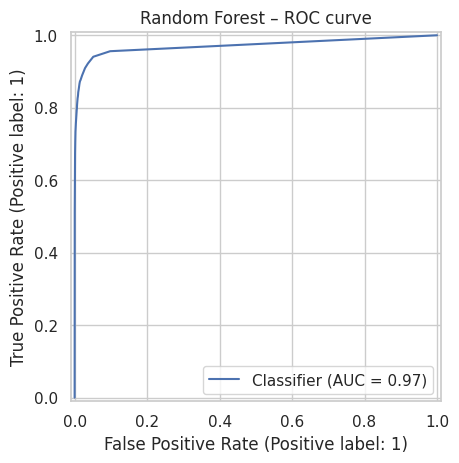

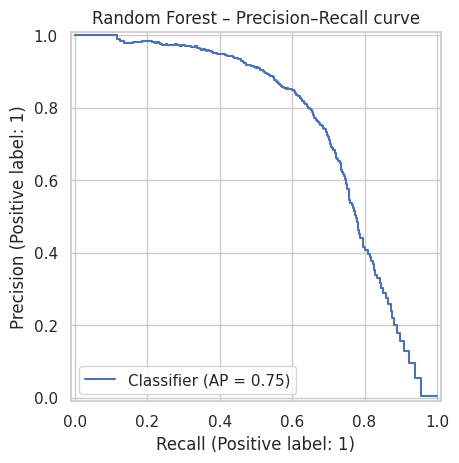

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1) Train
rf = RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        n_jobs=-1,
        class_weight="balanced_subsample",
        random_state=42
    )
rf.fit(X_train, y_train)

# Predict
y_pred  = rf.predict(X_test)
y_score = rf.predict_proba(X_test)[:, 1]

# Metrics + curves
evaluate_and_plot("Random Forest", y_test, y_pred, y_score)


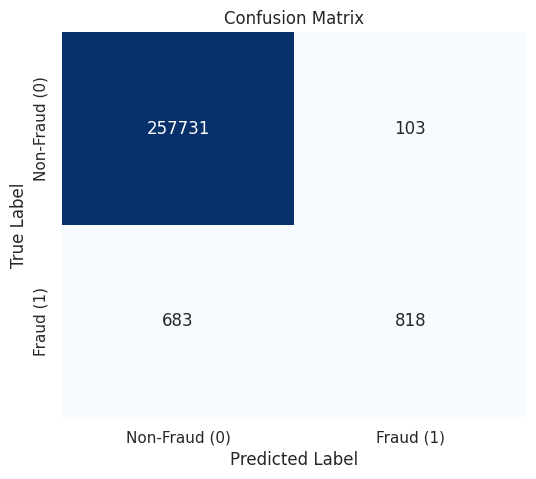

In [ ]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud (0)', 'Fraud (1)'],
            yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Logistics Regression Model

This step involves building and training a Logistic Regression model to predict fraudulent transactions. Logistic Regression is a widely used statistical and machine-learning method for binary classification, making it an appropriate baseline model for fraud detection (classifying is_fraud as 1 or 0).We built a machine learning pipeline combining feature scaling, SMOTE oversampling, and Logistic Regression to handle the severe class imbalance in the credit card fraud dataset. SMOTE was used to synthetically increase the number of fraud cases in the training set, helping the model learn fraud patterns more effectively. StandardScaler ensured that all numeric features were on a comparable scale, improving model stability. Logistic Regression was then trained on this balanced data to predict fraudulent transactions.


=== Logistic Regression ===
Accuracy : 0.9741
Precision: 0.1511
Recall   : 0.7522
F1       : 0.2516
ROC AUC  : 0.9081
PR AUC   : 0.1371

Confusion matrix:
 [[251490   6344]
 [   372   1129]]

Classification report:
               precision    recall  f1-score   support

           0      0.999     0.975     0.987    257834
           1      0.151     0.752     0.252      1501

    accuracy                          0.974    259335
   macro avg      0.575     0.864     0.619    259335
weighted avg      0.994     0.974     0.983    259335



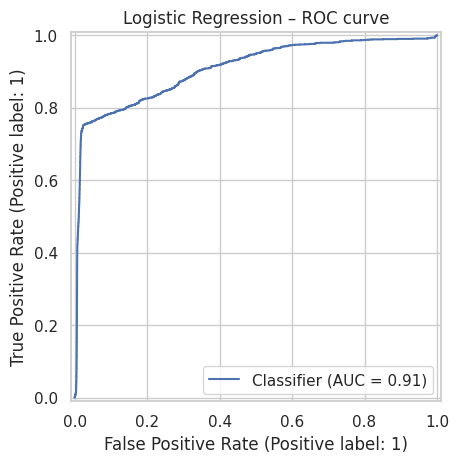

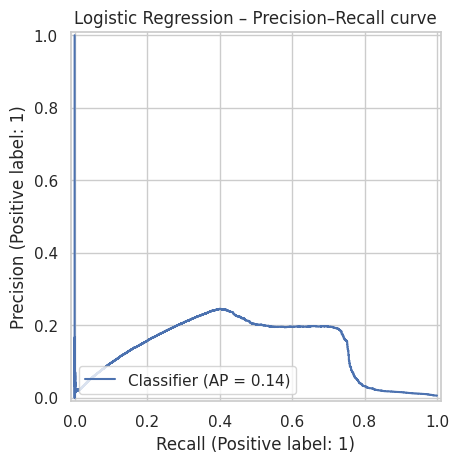

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 1) Train Logistic Regression Model (with scaling)
log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(
        solver='liblinear',        # good for small to medium datasets & binary classification
        class_weight='balanced',   # handle class imbalance like RF did
        random_state=42
    ))
])

# Fit the model
log_reg.fit(X_train, y_train)

# 2) Predict
y_pred = log_reg.predict(X_test)
y_score = log_reg.predict_proba(X_test)[:, 1]  # probability of positive class

# 3) Metrics + curves
evaluate_and_plot("Logistic Regression", y_test, y_pred, y_score)

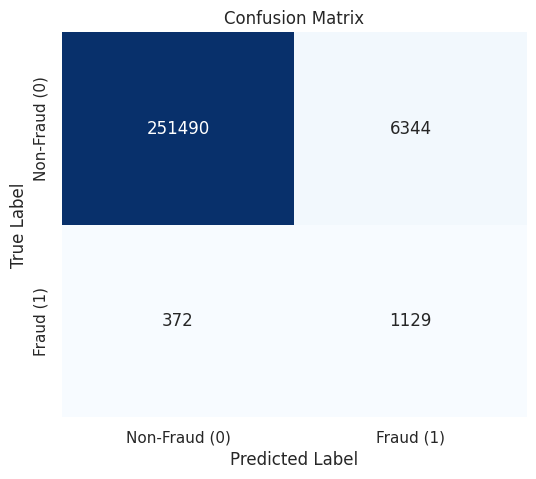

In [ ]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud (0)', 'Fraud (1)'],
            yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#View feature importance
import numpy as np
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.named_steps['lr'].coef_[0] # Access the LogisticRegression model from the pipeline
}).sort_values(by='Coefficient', ascending=False)

print("\nTop features contributing to fraud likelihood:")
print(feature_importance.head(10))


Top features contributing to fraud likelihood:
            Feature  Coefficient
15     amt_bin_>500     1.086440
14  amt_bin_250-500     0.642506
2               lat     0.155881
8       day_of_week     0.115862
6        merch_long     0.067966
10              age     0.051082
4          city_pop     0.004613
11          dist_km    -0.001085
7              hour    -0.007947
3              long    -0.049901


# **HistGradientBoostingClassifier**


=== HistGradientBoosting ===
Accuracy : 0.9614
Precision: 0.1247
Recall   : 0.942
F1       : 0.2203
ROC AUC  : 0.9888
PR AUC   : 0.697

Confusion matrix:
 [[247910   9924]
 [    87   1414]]

Classification report:
               precision    recall  f1-score   support

           0      1.000     0.962     0.980    257834
           1      0.125     0.942     0.220      1501

    accuracy                          0.961    259335
   macro avg      0.562     0.952     0.600    259335
weighted avg      0.995     0.961     0.976    259335



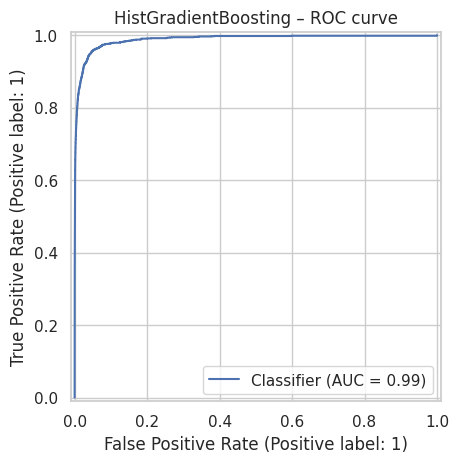

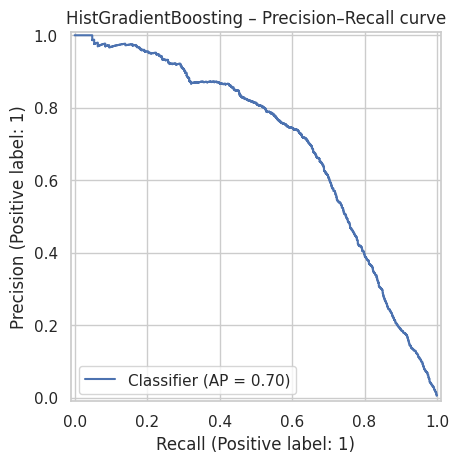

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np

# Handle class imbalance with sample weights
n_pos = int((y_train == 1).sum())
n_neg = int((y_train == 0).sum())
pos_weight = n_neg / max(n_pos, 1)  # scale positives up
sample_w = np.where(y_train == 1, pos_weight, 1.0)

hgb = HistGradientBoostingClassifier(
    learning_rate=0.08,
    max_depth=None,          # use None + max_leaf_nodes to control complexity
    max_leaf_nodes=31,
    min_samples_leaf=20,
    l2_regularization=0.0,
    max_iter=300,
    early_stopping=True,
    random_state=42
)

hgb.fit(X_train, y_train, sample_weight=sample_w)

y_pred  = hgb.predict(X_test)
y_score = hgb.predict_proba(X_test)[:, 1]

evaluate_and_plot("HistGradientBoosting", y_test, y_pred, y_score)


# **SHAP Plot**

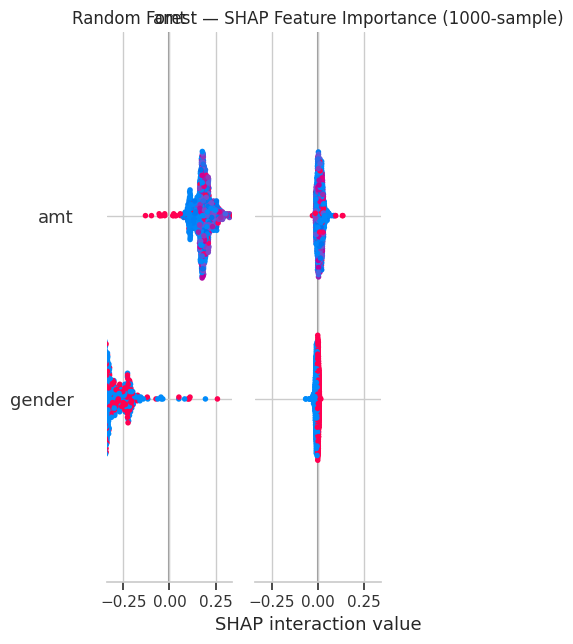

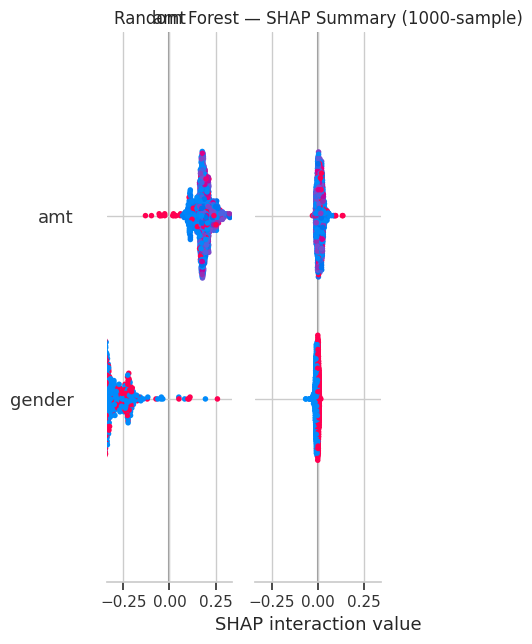

In [ ]:
import numpy as np
import shap
import matplotlib.pyplot as plt

# === 0) choose model & transformed features (pipeline or plain RF) ===
use_pipeline = "pipe" in globals()
if use_pipeline:
    model = pipe.named_steps["clf"]
    X_test_t = pipe.named_steps["prep"].transform(X_test)

    pre = pipe.named_steps["prep"]
    num_cols = list(pre.transformers_[0][2]) if pre.transformers_ else []
    cat_cols = list(pre.transformers_[1][2]) if len(pre.transformers_) > 1 else []
    ohe = pre.named_transformers_.get("cat", None)
    cat_names = list(ohe.get_feature_names_out(cat_cols)) if ohe is not None else []
    feature_names = num_cols + cat_names
else:
    model = rf
    X_test_t = X_test.values
    feature_names = list(X_test.columns)

# === 1) sample up to 1000 rows ===
n = X_test_t.shape[0]
k = min(1000, n)
rng = np.random.default_rng(42)
idx = rng.choice(n, size=k, replace=False)

X_shap = X_test_t[idx]
if not use_pipeline:  # for dependence plots that need raw data
    data_raw = X_test.iloc[idx]
else:
    data_raw = X_test.iloc[idx]  # original columns (for titles only)

# === 2) SHAP with TreeExplainer ===
explainer = shap.TreeExplainer(model)
try:
    exp = explainer(X_shap, check_additivity=False)
    values, data = exp.values, exp.data
except Exception:
    vals = explainer.shap_values(X_shap)
    values = vals[1] if isinstance(vals, list) else vals
    data = X_shap

# === 3) Plots ===
shap.summary_plot(values, data, feature_names=feature_names, plot_type="bar", show=False)
plt.title("Random Forest — SHAP Feature Importance (1000-sample)")
plt.tight_layout(); plt.show()

shap.summary_plot(values, data, feature_names=feature_names, show=False)
plt.title("Random Forest — SHAP Summary (1000-sample)")
plt.tight_layout(); plt.show()


In [ ]:
# If needed: pip install shap
# !pip install shap

import numpy as np
import shap
import matplotlib.pyplot as plt

# ----------------------------
# 1) Hook into your trained model and features
# ----------------------------
use_pipeline = "pipe" in globals()  # set True if you trained with a Pipeline
if use_pipeline:
    # Grab the fitted tree model and transformed features
    model = pipe.named_steps["clf"]

    # Transform the test set with the same preprocessor
    X_test_t = pipe.named_steps["prep"].transform(X_test)

    # Build feature names (num + expanded OHE cats)
    pre = pipe.named_steps["prep"]
    # assuming transformers_[0] = ("num", passthrough, num_cols)
    num_cols = list(pre.transformers_[0][2]) if pre.transformers_ else []
    cat_cols = list(pre.transformers_[1][2]) if len(pre.transformers_) > 1 else []

    ohe = pre.named_transformers_["cat"] if "cat" in pre.named_transformers_ else None
    if ohe is not None:
        cat_names = list(ohe.get_feature_names_out(cat_cols))
    else:
        cat_names = []
    feature_names = num_cols + cat_names
else:
    # Plain RandomForest trained directly on pandas DataFrame
    model = rf
    X_test_t = X_test.values
    feature_names = list(X_test.columns)

# ----------------------------
# 2) Create SHAP explainer (TreeExplainer for RF)
# ----------------------------
explainer = shap.TreeExplainer(model)

# For SHAP versions: handle both old/new APIs
try:
    # New API returns a shap.Explanation
    shap_values = explainer(X_test_t, check_additivity=False)
    values = shap_values.values
    data   = shap_values.data
except Exception:
    # Older API
    shap_values = explainer.shap_values(X_test_t)
    # Binary clf → shap_values is list [class0, class1]; use class1
    values = shap_values[1] if isinstance(shap_values, list) else shap_values
    data   = X_test_t

# ----------------------------
# 3) Summary plots
# ----------------------------
# (a) Bar plot of mean |SHAP| (global importance)
shap.summary_plot(values, data, feature_names=feature_names, plot_type="bar", show=False)
plt.title("Random Forest — SHAP Feature Importance (mean |SHAP|)")
plt.tight_layout()
plt.show()

# (b) Beeswarm (distribution of impacts per feature)
shap.summary_plot(values, data, feature_names=feature_names, show=False)
plt.title("Random Forest — SHAP Summary (beeswarm)")
plt.tight_layout()
plt.show()

# ----------------------------
# 4) Optional: Dependence plot for the top feature
# ----------------------------
# pick top feature by mean |SHAP|
mean_abs = np.abs(values).mean(axis=0)
top_idx = int(mean_abs.argmax())
top_feat = feature_names[top_idx]

shap.dependence_plot(
    top_feat, values, data, feature_names=feature_names, show=False
)
plt.title(f"SHAP Dependence — {top_feat}")
plt.tight_layout()
plt.show()


NameError: name 'rf' is not defined

In [ ]:
# after: sv = explainer.shap_values(X_exp, check_additivity=False)
import numpy as np

# unify shapes across SHAP versions
if isinstance(sv, list):
    sv = sv[1]                 # class 1
sv = np.asarray(sv)
if sv.ndim == 3:               # (n_samples, n_features, n_classes)
    sv = sv[..., 1]            # take class 1 → (n_samples, n_features)
# now sv is (n_samples, n_features)


In [ ]:
j = 0
base = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, tuple, np.ndarray)) \
       else explainer.expected_value

sv_row = sv[j]                 # shape (n_features,)
x_row  = X_exp.iloc[j]         # length n_features

# Option A: matplotlib force plot (single sample only)
shap.force_plot(base, sv_row, x_row, matplotlib=True)

# Option B: waterfall (recommended)
exp = shap.Explanation(values=sv_row, base_values=float(base),
                       data=x_row.values, feature_names=list(X_exp.columns))
shap.plots.waterfall(exp, max_display=15)


NameError: name 'explainer' is not defined

In [ ]:
shap.decision_plot(base, sv[:100], feature_names=list(X_exp.columns))
